# Exploring parameters

#### density plots, post predictive checks etc.

In [2]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [3]:
print(torch.__version__)

1.11.0


In [4]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [5]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [6]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [39]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os


#file = 'multi_round'

file = 'multi_round_10000_17params_nsf_fake_2104_001_std'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu/results


In [40]:
#posterior = posteriors_round[1]

In [41]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((1000,), not_within_prior=False)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1000 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  7.633587786259541e-06
acceptance rate:  7.092198581560284e-06
acceptance rate:  6.62251655629139e-06
acceptance rate:  6.2111801242236025e-06
acceptance rate:  5.847953216374269e-06
acceptance rate:  5.524861878453038e-06
acceptance rate:  5.235602094240837e-06
acceptance rate:  4.975124378109453e-06
acceptance rate:  4.739336492890995e-06
acceptance rate:  4.5248868778280546e-06
acceptance rate:  4.329004329004329e-06
acceptance rate:  4.149377593360996e-06
acceptance rate:  7.96812749003984e-06
acceptance rate:  7.662835249042145e-06
acceptance rate:  7.380073800738008e-06
acceptance rate:  7.1174377224199285e-06
acceptance rate:  6.8728522336769755e-06
acceptance rate:  6.644518272425

acceptance rate:  4.283674440742504e-06
acceptance rate:  4.263382283278067e-06
acceptance rate:  4.2432814710042435e-06
acceptance rate:  4.223369310183012e-06
acceptance rate:  4.203643157403082e-06
acceptance rate:  4.184100418410042e-06
acceptance rate:  4.1647385469689955e-06
acceptance rate:  4.145555043758637e-06
acceptance rate:  4.126547455295736e-06
acceptance rate:  4.107713372889092e-06
acceptance rate:  4.08905043162199e-06
acceptance rate:  4.07055630936228e-06
acceptance rate:  4.05222872579919e-06
acceptance rate:  4.034065441506051e-06
acceptance rate:  4.016064257028113e-06
acceptance rate:  3.998223011994669e-06
acceptance rate:  3.980539584254754e-06
acceptance rate:  3.963011889035667e-06
acceptance rate:  3.94563787812363e-06
acceptance rate:  3.92841553906591e-06
acceptance rate:  3.911342894393742e-06
acceptance rate:  3.894418000865426e-06
acceptance rate:  3.877638948728996e-06
acceptance rate:  3.861003861003861e-06
acceptance rate:  3.844510892780863e-06
acc

acceptance rate:  4.085556356645038e-06
acceptance rate:  4.075761208343323e-06
acceptance rate:  4.066012915570438e-06
acceptance rate:  4.056311142925316e-06
acceptance rate:  4.284694120447513e-06
acceptance rate:  4.274519116599382e-06
acceptance rate:  4.501303008765695e-06
acceptance rate:  4.490664145592059e-06
acceptance rate:  4.480075453902382e-06
acceptance rate:  4.469536579628323e-06
acceptance rate:  4.459047172025346e-06
acceptance rate:  4.448606883633809e-06
acceptance rate:  4.438215370240598e-06
acceptance rate:  4.427872290841296e-06
acceptance rate:  4.417577307602883e-06
acceptance rate:  4.407330085826954e-06
acceptance rate:  4.397130293913446e-06
acceptance rate:  4.3869776033248675e-06
acceptance rate:  4.376871688551025e-06
acceptance rate:  4.3668122270742355e-06
acceptance rate:  4.356798899335015e-06
acceptance rate:  4.3468313886982385e-06
acceptance rate:  4.3369093814197675e-06
acceptance rate:  4.327032566613528e-06
acceptance rate:  4.317200636219041e

acceptance rate:  4.991144743197552e-06
acceptance rate:  5.143867545410705e-06
acceptance rate:  5.135612261274273e-06
acceptance rate:  5.127383432142285e-06
acceptance rate:  5.119180931051032e-06
acceptance rate:  5.111004631847948e-06
acceptance rate:  5.102854409185138e-06
acceptance rate:  5.094730138512975e-06
acceptance rate:  5.086631696073756e-06
acceptance rate:  5.078558958895413e-06
acceptance rate:  5.070511804785295e-06
acceptance rate:  5.062490112323999e-06
acceptance rate:  5.054493760859264e-06
acceptance rate:  5.046522630499921e-06
acceptance rate:  5.038576602109904e-06
acceptance rate:  5.030655557302311e-06
acceptance rate:  5.022759378433527e-06
acceptance rate:  5.014887948597399e-06
acceptance rate:  5.163511187607573e-06
acceptance rate:  5.155444461802843e-06
acceptance rate:  5.147402901263454e-06
acceptance rate:  5.13938638841302e-06
acceptance rate:  5.131394806406469e-06
acceptance rate:  5.123428039124359e-06
acceptance rate:  5.115485971167261e-06
a

acceptance rate:  4.47346149195986e-06
acceptance rate:  4.4680594131143584e-06
acceptance rate:  4.462670365456519e-06
acceptance rate:  4.457294301891339e-06
acceptance rate:  4.4519311755504755e-06
acceptance rate:  4.44658093979089e-06
acceptance rate:  4.4412435481934944e-06
acceptance rate:  4.435918954561803e-06
acceptance rate:  4.430607112920609e-06
acceptance rate:  4.4253079775146515e-06
acceptance rate:  4.420021502807311e-06
acceptance rate:  4.414747643479298e-06
acceptance rate:  4.409486354427363e-06
acceptance rate:  4.404237590763004e-06
acceptance rate:  4.3990013078111996e-06
acceptance rate:  4.393777461109132e-06
acceptance rate:  4.388566006404934e-06
acceptance rate:  4.383366899656438e-06
acceptance rate:  4.3781800970299375e-06
acceptance rate:  4.373005554898948e-06
acceptance rate:  4.367843229842993e-06
acceptance rate:  4.362693078646386e-06
acceptance rate:  4.35755505829702e-06
acceptance rate:  4.352429125985178e-06
acceptance rate:  4.347315239102338e-

acceptance rate:  4.170303559305596e-06
acceptance rate:  4.166262959015599e-06
acceptance rate:  4.162230181008615e-06
acceptance rate:  4.158205202591626e-06
acceptance rate:  4.154188001159308e-06
acceptance rate:  4.150178554193611e-06
acceptance rate:  4.14617683926333e-06
acceptance rate:  4.1421828340236976e-06
acceptance rate:  4.138196516215956e-06
acceptance rate:  4.134217863666955e-06
acceptance rate:  4.130246854288733e-06
acceptance rate:  4.126283466078111e-06
acceptance rate:  4.122327677116288e-06
acceptance rate:  4.1183794655684326e-06
acceptance rate:  4.114438809683284e-06
acceptance rate:  4.110505687792754e-06
acceptance rate:  4.1065800783115274e-06
acceptance rate:  4.1026619597366666e-06
acceptance rate:  4.0987513106472215e-06
acceptance rate:  4.094848109703838e-06
acceptance rate:  4.090952335648368e-06
acceptance rate:  4.087063967303488e-06
acceptance rate:  4.0831829835723104e-06
acceptance rate:  4.079309363438004e-06
acceptance rate:  4.075443085963416

acceptance rate:  4.284213078975022e-06
acceptance rate:  4.280752766335514e-06
acceptance rate:  4.277298038899201e-06
acceptance rate:  4.273848883154584e-06
acceptance rate:  4.270405285633712e-06
acceptance rate:  4.2669672329120035e-06
acceptance rate:  4.263534711608077e-06
acceptance rate:  4.26010770838357e-06
acceptance rate:  4.256686209942976e-06
acceptance rate:  4.253270203033465e-06
acceptance rate:  4.2498596744447116e-06
acceptance rate:  4.2464546110087335e-06
acceptance rate:  4.243054999599712e-06
acceptance rate:  4.239660827133829e-06
acceptance rate:  4.236272080569099e-06
acceptance rate:  4.232888746905199e-06
acceptance rate:  4.229510813183306e-06
acceptance rate:  4.2261382664859265e-06
acceptance rate:  4.302446020237431e-06
acceptance rate:  4.29902077860043e-06
acceptance rate:  4.2956009863972635e-06
acceptance rate:  4.292186630633495e-06
acceptance rate:  4.288777698355969e-06
acceptance rate:  4.2853741766526465e-06
acceptance rate:  4.281976052652446e

acceptance rate:  4.019125493728778e-06
acceptance rate:  4.016342358562426e-06
acceptance rate:  4.013563075219708e-06
acceptance rate:  4.010787635709841e-06
acceptance rate:  4.008016032064128e-06
acceptance rate:  4.005248256335888e-06
acceptance rate:  4.002484300600372e-06
acceptance rate:  3.9997241569546925e-06
acceptance rate:  3.996967817517745e-06
acceptance rate:  3.994215274430136e-06
acceptance rate:  3.991466519854105e-06
acceptance rate:  3.9887215459734545e-06
acceptance rate:  3.985980344993471e-06
acceptance rate:  3.983242909140856e-06
acceptance rate:  3.980509230663647e-06
acceptance rate:  4.04636170358686e-06
acceptance rate:  4.0435885134672054e-06
acceptance rate:  4.040819121977947e-06
acceptance rate:  4.038053521319554e-06
acceptance rate:  4.035291703713836e-06
acceptance rate:  4.100881689563256e-06
acceptance rate:  4.098080732190424e-06
acceptance rate:  4.095283598389188e-06
acceptance rate:  4.092490280335584e-06
acceptance rate:  4.089700770226979e-0

acceptance rate:  4.125963230386506e-06
acceptance rate:  4.123461281911346e-06
acceptance rate:  4.120962365917217e-06
acceptance rate:  4.118466476894192e-06
acceptance rate:  4.115973609345681e-06
acceptance rate:  4.113483757788398e-06
acceptance rate:  4.110996916752312e-06
acceptance rate:  4.108513080780618e-06
acceptance rate:  4.106032244429684e-06
acceptance rate:  4.103554402269024e-06
acceptance rate:  4.10107954888125e-06
acceptance rate:  4.098607678862034e-06
acceptance rate:  4.096138786820071e-06
acceptance rate:  4.093672867377039e-06
acceptance rate:  4.091209915167559e-06
acceptance rate:  4.088749924839156e-06
acceptance rate:  4.08629289105222e-06
acceptance rate:  4.083838808479971e-06
acceptance rate:  4.0813876718084145e-06
acceptance rate:  4.078939475736309e-06
acceptance rate:  4.0764942149751215e-06
acceptance rate:  4.074051884248996e-06
acceptance rate:  4.071612478294713e-06
acceptance rate:  4.069175991861648e-06
acceptance rate:  4.06674241971174e-06
a

acceptance rate:  4.099023785124859e-06
acceptance rate:  4.0968141879143985e-06
acceptance rate:  4.0946069716071334e-06
acceptance rate:  4.0924021323569e-06
acceptance rate:  4.090199666325817e-06
acceptance rate:  4.087999569684256e-06
acceptance rate:  4.085801838610828e-06
acceptance rate:  4.083606469292354e-06
acceptance rate:  4.081413457923849e-06
acceptance rate:  4.079222800708497e-06
acceptance rate:  4.077034493857626e-06
acceptance rate:  4.074848533590692e-06
acceptance rate:  4.072664916135255e-06
acceptance rate:  4.070483637726956e-06
acceptance rate:  4.068304694609496e-06
acceptance rate:  4.066128083034616e-06
acceptance rate:  4.063953799262071e-06
acceptance rate:  4.061781839559617e-06
acceptance rate:  4.059612200202981e-06
acceptance rate:  4.057444877475842e-06
acceptance rate:  4.055279867669815e-06
acceptance rate:  4.053117167084422e-06
acceptance rate:  4.050956772027077e-06
acceptance rate:  4.0487986788130624e-06
acceptance rate:  4.046642883765508e-06

acceptance rate:  3.883306635600214e-06
acceptance rate:  3.881422541361409e-06
acceptance rate:  3.879540274477474e-06
acceptance rate:  3.877659832291213e-06
acceptance rate:  3.875781212150574e-06
acceptance rate:  3.873904411408649e-06
acceptance rate:  3.872029427423648e-06
acceptance rate:  3.870156257558899e-06
acceptance rate:  3.868284899182825e-06
acceptance rate:  3.866415349668938e-06
acceptance rate:  3.864547606395826e-06
acceptance rate:  3.8626816667471395e-06
acceptance rate:  3.8608175281115775e-06
acceptance rate:  3.858955187882881e-06
acceptance rate:  3.8570946434598136e-06
acceptance rate:  3.855235892246157e-06
acceptance rate:  3.853378931650691e-06
acceptance rate:  3.851523759087189e-06
acceptance rate:  3.8496703719743995e-06
acceptance rate:  3.847818767736039e-06
acceptance rate:  3.845968943800779e-06
acceptance rate:  3.8441208976022295e-06
acceptance rate:  3.842274626578935e-06
acceptance rate:  3.8404301281743555e-06
acceptance rate:  3.83858739983686

acceptance rate:  3.795066413662239e-06
acceptance rate:  3.793392439680649e-06
acceptance rate:  3.7917199418015078e-06
acceptance rate:  3.790048918073245e-06
acceptance rate:  3.788379366547729e-06
acceptance rate:  3.7867112852802606e-06
acceptance rate:  3.7850446723295628e-06
acceptance rate:  3.783379525757776e-06
acceptance rate:  3.781715843630447e-06
acceptance rate:  3.780053624016527e-06
acceptance rate:  3.778392864988357e-06
acceptance rate:  3.776733564621668e-06
acceptance rate:  3.7750757209955666e-06
acceptance rate:  3.7734193321925323e-06
acceptance rate:  3.771764396298408e-06
acceptance rate:  3.7701109114023936e-06
acceptance rate:  3.768458875597038e-06
acceptance rate:  3.7668082869782314e-06
acceptance rate:  3.7651591436451995e-06
acceptance rate:  3.7635114437004947e-06
acceptance rate:  3.7618651852499892e-06
acceptance rate:  3.7602203664028683e-06
acceptance rate:  3.758576985271623e-06
acceptance rate:  3.7569350399720416e-06
acceptance rate:  3.75529452

acceptance rate:  3.805513946803773e-06
acceptance rate:  3.803973938731739e-06
acceptance rate:  3.802435176570527e-06
acceptance rate:  3.8008976588087823e-06
acceptance rate:  3.7993613839375937e-06
acceptance rate:  3.797826350450487e-06
acceptance rate:  3.796292556843423e-06
acceptance rate:  3.7947600016147915e-06
acceptance rate:  3.793228683265405e-06
acceptance rate:  3.8320358194506075e-06
acceptance rate:  3.830490706019919e-06
acceptance rate:  3.828946838096006e-06
acceptance rate:  3.827404214173482e-06
acceptance rate:  3.825862832749386e-06
acceptance rate:  3.824322692323176e-06
acceptance rate:  3.822783791396724e-06
acceptance rate:  3.821246128474317e-06
acceptance rate:  3.819709702062643e-06
acceptance rate:  3.818174510670793e-06
acceptance rate:  3.816640552810253e-06
acceptance rate:  3.8151078269949e-06
acceptance rate:  3.813576331740998e-06
acceptance rate:  3.812046065567192e-06
acceptance rate:  3.8105170269945047e-06
acceptance rate:  3.8089892145463294e

acceptance rate:  3.814367450731087e-06
acceptance rate:  3.850323352398041e-06
acceptance rate:  3.848884570830686e-06
acceptance rate:  3.847446864144037e-06
acceptance rate:  3.846010231134013e-06
acceptance rate:  3.844574670598335e-06
acceptance rate:  3.843140181336517e-06
acceptance rate:  3.879004886054231e-06
acceptance rate:  3.877558629432161e-06
acceptance rate:  3.876113450859081e-06
acceptance rate:  3.874669349130062e-06
acceptance rate:  3.8732263230419725e-06
acceptance rate:  3.87178437139347e-06
acceptance rate:  3.870343492985003e-06
acceptance rate:  3.868903686618801e-06
acceptance rate:  3.86746495109888e-06
acceptance rate:  3.866027285231032e-06
acceptance rate:  3.864590687822823e-06
acceptance rate:  3.863155157683592e-06
acceptance rate:  3.861720693624447e-06
acceptance rate:  3.860287294458261e-06
acceptance rate:  3.858854958999666e-06
acceptance rate:  3.857423686065057e-06
acceptance rate:  3.8559934744725815e-06
acceptance rate:  3.8545643230421405e-06

acceptance rate:  3.994303775485395e-06
acceptance rate:  3.992916912607201e-06
acceptance rate:  3.991531012460518e-06
acceptance rate:  3.990146074043233e-06
acceptance rate:  3.988762096354618e-06
acceptance rate:  3.98737907839534e-06
acceptance rate:  3.9859970191674465e-06
acceptance rate:  3.98461591767437e-06
acceptance rate:  3.983235772920924e-06
acceptance rate:  3.981856583913299e-06
acceptance rate:  3.980478349659063e-06
acceptance rate:  3.979101069167157e-06
acceptance rate:  3.9777247414478914e-06
acceptance rate:  3.976349365512949e-06
acceptance rate:  3.9749749403753756e-06
acceptance rate:  3.973601465049584e-06
acceptance rate:  3.972228938551345e-06
acceptance rate:  3.9708573598977935e-06
acceptance rate:  3.969486728107418e-06
acceptance rate:  3.968117042200062e-06
acceptance rate:  3.9667483011969236e-06
acceptance rate:  3.965380504120548e-06
acceptance rate:  3.9640136499948295e-06
acceptance rate:  3.962647737845009e-06
acceptance rate:  3.961282766697668e

acceptance rate:  3.889663219992869e-06
acceptance rate:  3.888402838534072e-06
acceptance rate:  3.887143273622494e-06
acceptance rate:  3.885884524464881e-06
acceptance rate:  3.88462659026901e-06
acceptance rate:  3.883369470243682e-06
acceptance rate:  3.8821131635987185e-06
acceptance rate:  3.880857669544969e-06
acceptance rate:  3.8796029872943e-06
acceptance rate:  3.878349116059597e-06
acceptance rate:  3.877096055054764e-06
acceptance rate:  3.875843803494719e-06
acceptance rate:  3.874592360595396e-06
acceptance rate:  3.873341725573739e-06
acceptance rate:  3.872091897647704e-06
acceptance rate:  3.870842876036257e-06
acceptance rate:  3.869594659959369e-06
acceptance rate:  3.868347248638019e-06
acceptance rate:  3.86710064129419e-06
acceptance rate:  3.865854837150865e-06
acceptance rate:  3.864609835432031e-06
acceptance rate:  3.863365635362673e-06
acceptance rate:  3.862122236168775e-06
acceptance rate:  3.860879637077314e-06
acceptance rate:  3.859637837316265e-06
acc

acceptance rate:  4.010817052049467e-06
acceptance rate:  4.009598736368883e-06
acceptance rate:  4.008381160608545e-06
acceptance rate:  4.007164324094593e-06
acceptance rate:  4.005948226153987e-06
acceptance rate:  4.004732866114499e-06
acceptance rate:  4.033847926966121e-06
acceptance rate:  4.032624844607501e-06
acceptance rate:  4.0314025037131335e-06
acceptance rate:  4.030180903608982e-06
acceptance rate:  4.028960043621823e-06
acceptance rate:  4.027739923079252e-06
acceptance rate:  4.026520541309679e-06
acceptance rate:  4.0253018976423235e-06
acceptance rate:  4.024083991407219e-06
acceptance rate:  4.022866821935211e-06
acceptance rate:  4.021650388557951e-06
acceptance rate:  4.020434690607902e-06
acceptance rate:  4.0192197274183314e-06
acceptance rate:  4.018005498323314e-06
acceptance rate:  4.016792002657727e-06
acceptance rate:  4.015579239757253e-06
acceptance rate:  4.014367208958378e-06
acceptance rate:  4.013155909598383e-06
acceptance rate:  4.011945341015354e-

acceptance rate:  4.0605072774584654e-06
acceptance rate:  4.05934650238701e-06
acceptance rate:  4.058186390786202e-06
acceptance rate:  4.057026942087369e-06
acceptance rate:  4.055868155722487e-06
acceptance rate:  4.054710031124183e-06
acceptance rate:  4.0535525677257285e-06
acceptance rate:  4.052395764961046e-06
acceptance rate:  4.0512396222647e-06
acceptance rate:  4.0500841390719035e-06
acceptance rate:  4.048929314818511e-06
acceptance rate:  4.047775148941022e-06
acceptance rate:  4.046621640876578e-06
acceptance rate:  4.045468790062961e-06
acceptance rate:  4.044316595938594e-06
acceptance rate:  4.043165057942541e-06
acceptance rate:  4.042014175514503e-06
acceptance rate:  4.040863948094818e-06
acceptance rate:  4.039714375124463e-06
acceptance rate:  4.03856545604505e-06
acceptance rate:  4.037417190298826e-06
acceptance rate:  4.0362695773286715e-06
acceptance rate:  4.035122616578102e-06
acceptance rate:  4.033976307491264e-06
acceptance rate:  4.032830649512936e-06


acceptance rate:  4.023655855904512e-06
acceptance rate:  4.022569585054399e-06
acceptance rate:  4.021483900569486e-06
acceptance rate:  4.020398801975122e-06
acceptance rate:  4.019314288797173e-06
acceptance rate:  4.018230360562013e-06
acceptance rate:  4.017147016796527e-06
acceptance rate:  4.016064257028113e-06
acceptance rate:  4.0149820807846734e-06
acceptance rate:  4.013900487594623e-06
acceptance rate:  4.012819476986884e-06
acceptance rate:  4.011739048490886e-06
acceptance rate:  4.010659201636564e-06
acceptance rate:  4.009579935954361e-06
acceptance rate:  4.008501250975223e-06
acceptance rate:  4.007423146230602e-06
acceptance rate:  4.006345621252453e-06
acceptance rate:  4.0052686755732376e-06
acceptance rate:  4.004192308725914e-06
acceptance rate:  4.0031165202439485e-06
acceptance rate:  4.002041309661304e-06
acceptance rate:  4.000966676512446e-06
acceptance rate:  3.99989262033234e-06
acceptance rate:  4.02565685300985e-06
acceptance rate:  4.024576748678597e-06

acceptance rate:  4.1697577447494305e-06
acceptance rate:  4.168691337817447e-06
acceptance rate:  4.16762547620874e-06
acceptance rate:  4.166560159505125e-06
acceptance rate:  4.165495387288851e-06
acceptance rate:  4.164431159142587e-06
acceptance rate:  4.163367474649434e-06
acceptance rate:  4.162304333392916e-06
acceptance rate:  4.161241734956984e-06
acceptance rate:  4.16017967892601e-06
acceptance rate:  4.159118164884795e-06
acceptance rate:  4.158057192418561e-06
acceptance rate:  4.156996761112953e-06
acceptance rate:  4.15593687055404e-06
acceptance rate:  4.154877520328312e-06
acceptance rate:  4.15381871002268e-06
acceptance rate:  4.152760439224479e-06
acceptance rate:  4.151702707521459e-06
acceptance rate:  4.150645514501795e-06
acceptance rate:  4.14958885975408e-06
acceptance rate:  4.148532742867323e-06
acceptance rate:  4.147477163430956e-06
acceptance rate:  4.146422121034825e-06
acceptance rate:  4.145367615269195e-06
acceptance rate:  4.1443136457247465e-06
acc

acceptance rate:  4.2040290636922554e-06
acceptance rate:  4.203007701464979e-06
acceptance rate:  4.201986835393845e-06
acceptance rate:  4.200966465117409e-06
acceptance rate:  4.199946590274574e-06
acceptance rate:  4.1989272105045995e-06
acceptance rate:  4.197908325447089e-06
acceptance rate:  4.1968899347420006e-06
acceptance rate:  4.195872038029638e-06
acceptance rate:  4.194854634950656e-06
acceptance rate:  4.193837725146057e-06
acceptance rate:  4.192821308257192e-06
acceptance rate:  4.191805383925759e-06
acceptance rate:  4.190789951793803e-06
acceptance rate:  4.189775011503717e-06
acceptance rate:  4.18876056269824e-06
acceptance rate:  4.187746605020454e-06
acceptance rate:  4.186733138113792e-06
acceptance rate:  4.185720161622027e-06
acceptance rate:  4.18470767518928e-06
acceptance rate:  4.183695678460013e-06
acceptance rate:  4.182684171079036e-06
acceptance rate:  4.181673152691499e-06
acceptance rate:  4.1806626229428965e-06
acceptance rate:  4.1796525814790655e-

acceptance rate:  4.1887482354030225e-06
acceptance rate:  4.187779088868837e-06
acceptance rate:  4.186810390691864e-06
acceptance rate:  4.185842140561041e-06
acceptance rate:  4.184874338165592e-06
acceptance rate:  4.183906983195025e-06
acceptance rate:  4.182940075339142e-06
acceptance rate:  4.205078440886301e-06
acceptance rate:  4.204107089233328e-06
acceptance rate:  4.203136186231265e-06
acceptance rate:  4.202165731569347e-06
acceptance rate:  4.201195724937098e-06
acceptance rate:  4.2002261660243245e-06
acceptance rate:  4.1992570545211235e-06
acceptance rate:  4.198288390117875e-06
acceptance rate:  4.197320172505247e-06
acceptance rate:  4.19635240137419e-06
acceptance rate:  4.1953850764159425e-06
acceptance rate:  4.194418197322026e-06
acceptance rate:  4.193451763784244e-06
acceptance rate:  4.19248577549469e-06
acceptance rate:  4.1915202321457355e-06
acceptance rate:  4.1905551334300386e-06
acceptance rate:  4.189590479040538e-06
acceptance rate:  4.188626268670456e

acceptance rate:  4.174858076914581e-06
acceptance rate:  4.173936087983923e-06
acceptance rate:  4.173014506193283e-06
acceptance rate:  4.17209333127304e-06
acceptance rate:  4.171172562953808e-06
acceptance rate:  4.170252200966439e-06
acceptance rate:  4.169332245042024e-06
acceptance rate:  4.16841269491189e-06
acceptance rate:  4.167493550307601e-06
acceptance rate:  4.166574810960958e-06
acceptance rate:  4.165656476603998e-06
acceptance rate:  4.1647385469689955e-06
acceptance rate:  4.16382102178846e-06
acceptance rate:  4.162903900795137e-06
acceptance rate:  4.161987183722006e-06
acceptance rate:  4.1610708703022835e-06
acceptance rate:  4.16015496026942e-06
acceptance rate:  4.1592394533571e-06
acceptance rate:  4.1583243492992455e-06
acceptance rate:  4.157409647830008e-06
acceptance rate:  4.156495348683776e-06
acceptance rate:  4.155581451595171e-06
acceptance rate:  4.154667956299048e-06
acceptance rate:  4.153754862530494e-06
acceptance rate:  4.152842170024829e-06
acc

acceptance rate:  4.0987936025015315e-06
acceptance rate:  4.097927800426691e-06
acceptance rate:  4.097062364047222e-06
acceptance rate:  4.096197293131479e-06
acceptance rate:  4.116442549238986e-06
acceptance rate:  4.115573753192208e-06
acceptance rate:  4.1147053237956575e-06
acceptance rate:  4.113837260817282e-06
acceptance rate:  4.112969564025226e-06
acceptance rate:  4.112102233187828e-06
acceptance rate:  4.1112352680736226e-06
acceptance rate:  4.11036866845134e-06
acceptance rate:  4.109502434089904e-06
acceptance rate:  4.108636564758433e-06
acceptance rate:  4.107771060226244e-06
acceptance rate:  4.106905920262842e-06
acceptance rate:  4.106041144637931e-06
acceptance rate:  4.105176733121408e-06
acceptance rate:  4.104312685483362e-06
acceptance rate:  4.103449001494077e-06
acceptance rate:  4.102585680924028e-06
acceptance rate:  4.101722723543889e-06
acceptance rate:  4.100860129124519e-06
acceptance rate:  4.099997897436976e-06
acceptance rate:  4.0991360282525066e-

acceptance rate:  4.070391446102752e-06
acceptance rate:  4.069567330080379e-06
acceptance rate:  4.068743547701464e-06
acceptance rate:  4.067920098763434e-06
acceptance rate:  4.06709698306388e-06
acceptance rate:  4.0662742004005584e-06
acceptance rate:  4.065451750571388e-06
acceptance rate:  4.0646296333744515e-06
acceptance rate:  4.063807848607994e-06
acceptance rate:  4.062986396070425e-06
acceptance rate:  4.062165275560316e-06
acceptance rate:  4.0613444868764015e-06
acceptance rate:  4.060524029817579e-06
acceptance rate:  4.059703904182909e-06
acceptance rate:  4.058884109771612e-06
acceptance rate:  4.058064646383073e-06
acceptance rate:  4.057245513816839e-06
acceptance rate:  4.056426711872616e-06
acceptance rate:  4.055608240350275e-06
acceptance rate:  4.054790099049847e-06
acceptance rate:  4.0539722877715255e-06
acceptance rate:  4.053154806315662e-06
acceptance rate:  4.052337654482773e-06
acceptance rate:  4.051520832073532e-06
acceptance rate:  4.050704338888777e-

acceptance rate:  3.985148033669641e-06
acceptance rate:  3.984373481564984e-06
acceptance rate:  3.983599230485222e-06
acceptance rate:  3.982825280254901e-06
acceptance rate:  3.982051630698704e-06
acceptance rate:  3.981278281641452e-06
acceptance rate:  3.980505232908099e-06
acceptance rate:  3.979732484323737e-06
acceptance rate:  3.9789600357135926e-06
acceptance rate:  3.978187886903029e-06
acceptance rate:  3.977416037717545e-06
acceptance rate:  3.9766444879827745e-06
acceptance rate:  3.975873237524486e-06
acceptance rate:  3.975102286168583e-06
acceptance rate:  3.9743316337411065e-06
acceptance rate:  3.973561280068229e-06
acceptance rate:  3.97279122497626e-06
acceptance rate:  3.972021468291643e-06
acceptance rate:  3.971252009840957e-06
acceptance rate:  3.9704828494509115e-06
acceptance rate:  3.969713986948355e-06
acceptance rate:  3.968945422160268e-06
acceptance rate:  3.968177154913765e-06
acceptance rate:  3.967409185036094e-06
acceptance rate:  3.966641512354637e-

acceptance rate:  3.9064690379619076e-06
acceptance rate:  3.905739006933154e-06
acceptance rate:  3.905009248706115e-06
acceptance rate:  3.9042797631279075e-06
acceptance rate:  3.903550550045759e-06
acceptance rate:  3.902821609307016e-06
acceptance rate:  3.902092940759134e-06
acceptance rate:  3.901364544249687e-06
acceptance rate:  3.90063641962636e-06
acceptance rate:  3.899908566736952e-06
acceptance rate:  3.899180985429376e-06
acceptance rate:  3.898453675551659e-06
acceptance rate:  3.89772663695194e-06
acceptance rate:  3.896999869478473e-06
acceptance rate:  3.9149158293096694e-06
acceptance rate:  3.914186128869918e-06
acceptance rate:  3.9134567003969365e-06
acceptance rate:  3.9127275437387045e-06
acceptance rate:  3.911998658743317e-06
acceptance rate:  3.911270045258982e-06
acceptance rate:  3.9105417031340195e-06
acceptance rate:  3.909813632216865e-06
acceptance rate:  3.909085832356062e-06
acceptance rate:  3.908358303400272e-06
acceptance rate:  3.907631045198265e

acceptance rate:  3.923615485682403e-06
acceptance rate:  3.940904428568858e-06
acceptance rate:  3.940195390511146e-06
acceptance rate:  3.939486607544387e-06
acceptance rate:  3.938778079530944e-06
acceptance rate:  3.956051860243477e-06
acceptance rate:  3.955340608762878e-06
acceptance rate:  3.954629612985566e-06
acceptance rate:  3.953918872773674e-06
acceptance rate:  3.953208387989434e-06
acceptance rate:  3.9524981584951765e-06
acceptance rate:  3.951788184153329e-06
acceptance rate:  3.951078464826422e-06
acceptance rate:  3.950369000377081e-06
acceptance rate:  3.949659790668031e-06
acceptance rate:  3.948950835562097e-06
acceptance rate:  3.9482421349222015e-06
acceptance rate:  3.965477023559599e-06
acceptance rate:  3.964765612385856e-06
acceptance rate:  3.964054456422307e-06
acceptance rate:  3.963343555531644e-06
acceptance rate:  3.9626329095766615e-06
acceptance rate:  3.961922518420251e-06
acceptance rate:  3.9612123819254e-06
acceptance rate:  3.960502499955198e-06

acceptance rate:  3.922181149233787e-06
acceptance rate:  3.9215005812843786e-06
acceptance rate:  3.9208202494752e-06
acceptance rate:  3.92014015368337e-06
acceptance rate:  3.919460293786094e-06
acceptance rate:  3.918780669660662e-06
acceptance rate:  3.918101281184445e-06
acceptance rate:  3.9174221282349066e-06
acceptance rate:  3.91674321068959e-06
acceptance rate:  3.916064528426123e-06
acceptance rate:  3.915386081322223e-06
acceptance rate:  3.932029585491331e-06
acceptance rate:  3.9313486084411425e-06
acceptance rate:  3.930667867223079e-06
acceptance rate:  3.929987361714652e-06
acceptance rate:  3.92930709179346e-06
acceptance rate:  3.928627057337187e-06
acceptance rate:  3.927947258223599e-06
acceptance rate:  3.927267694330548e-06
acceptance rate:  3.926588365535971e-06
acceptance rate:  3.925909271717888e-06
acceptance rate:  3.925230412754405e-06
acceptance rate:  3.924551788523712e-06
acceptance rate:  3.9238733989040816e-06
acceptance rate:  3.923195243773872e-06
a

acceptance rate:  3.837067073272901e-06
acceptance rate:  3.836424251562212e-06
acceptance rate:  3.8357816451985725e-06
acceptance rate:  3.835139254073789e-06
acceptance rate:  3.834497078079737e-06
acceptance rate:  3.833855117108369e-06
acceptance rate:  3.833213371051707e-06
acceptance rate:  3.832571839801844e-06
acceptance rate:  3.83193052325095e-06
acceptance rate:  3.831289421291261e-06
acceptance rate:  3.830648533815092e-06
acceptance rate:  3.830007860714824e-06
acceptance rate:  3.8293674018829115e-06
acceptance rate:  3.828727157211884e-06
acceptance rate:  3.82808712659434e-06
acceptance rate:  3.8274473099229495e-06
acceptance rate:  3.826807707090456e-06
acceptance rate:  3.826168317989674e-06
acceptance rate:  3.825529142513489e-06
acceptance rate:  3.82489018055486e-06
acceptance rate:  3.8242514320068135e-06
acceptance rate:  3.823612896762452e-06
acceptance rate:  3.822974574714947e-06
acceptance rate:  3.82233646575754e-06
acceptance rate:  3.821698569783548e-06


acceptance rate:  3.855437300545917e-06
acceptance rate:  3.854812847216599e-06
acceptance rate:  3.854188596136095e-06
acceptance rate:  3.869755994883503e-06
acceptance rate:  3.8691295268006025e-06
acceptance rate:  3.868503261520532e-06
acceptance rate:  3.86787719894483e-06
acceptance rate:  3.867251338975097e-06
acceptance rate:  3.866625681512999e-06
acceptance rate:  3.866000226460265e-06
acceptance rate:  3.865374973718685e-06
acceptance rate:  3.864749923190117e-06
acceptance rate:  3.864125074776479e-06
acceptance rate:  3.879665702138666e-06
acceptance rate:  3.8790386449225e-06
acceptance rate:  3.878411790371843e-06
acceptance rate:  3.877785138388457e-06
acceptance rate:  3.87715868887417e-06
acceptance rate:  3.876532441730872e-06
acceptance rate:  3.8759063968605155e-06
acceptance rate:  3.875280554165119e-06
acceptance rate:  3.874654913546762e-06
acceptance rate:  3.874029474907589e-06
acceptance rate:  3.873404238149804e-06
acceptance rate:  3.872779203175679e-06
ac

acceptance rate:  3.919048141587371e-06
acceptance rate:  3.918433880346703e-06
acceptance rate:  3.917819811631223e-06
acceptance rate:  3.917205935350433e-06
acceptance rate:  3.91659225141389e-06
acceptance rate:  3.915978759731207e-06
acceptance rate:  3.915365460212056e-06
acceptance rate:  3.914752352766164e-06
acceptance rate:  3.914139437303314e-06
acceptance rate:  3.913526713733348e-06
acceptance rate:  3.928565838694026e-06
acceptance rate:  3.927951049279354e-06
acceptance rate:  3.927336452253915e-06
acceptance rate:  3.926722047527417e-06
acceptance rate:  3.92610783500962e-06
acceptance rate:  3.925493814610344e-06
acceptance rate:  3.924879986239464e-06
acceptance rate:  3.924266349806914e-06
acceptance rate:  3.923652905222679e-06
acceptance rate:  3.923039652396805e-06
acceptance rate:  3.922426591239393e-06
acceptance rate:  3.921813721660599e-06
acceptance rate:  3.921201043570636e-06
acceptance rate:  3.920588556879774e-06
acceptance rate:  3.9199762614983365e-06
a

acceptance rate:  4.024236533993409e-06
acceptance rate:  4.023625514340809e-06
acceptance rate:  4.03819586768077e-06
acceptance rate:  4.03758291464914e-06
acceptance rate:  4.036970147668118e-06
acceptance rate:  4.0363575666530095e-06
acceptance rate:  4.03574517151917e-06
acceptance rate:  4.035132962182006e-06
acceptance rate:  4.034520938556976e-06
acceptance rate:  4.0339091005595915e-06
acceptance rate:  4.033297448105412e-06
acceptance rate:  4.03268598111005e-06
acceptance rate:  4.03207469948917e-06
acceptance rate:  4.0314636031584854e-06
acceptance rate:  4.0308526920337625e-06
acceptance rate:  4.0302419660308175e-06
acceptance rate:  4.029631425065519e-06
acceptance rate:  4.029021069053786e-06
acceptance rate:  4.028410897911587e-06
acceptance rate:  4.027800911554943e-06
acceptance rate:  4.027191109899926e-06
acceptance rate:  4.026581492862657e-06
acceptance rate:  4.0259720603593105e-06
acceptance rate:  4.025362812306109e-06
acceptance rate:  4.024753748619328e-06

acceptance rate:  4.034692465138196e-06
acceptance rate:  4.03409843789108e-06
acceptance rate:  4.033504585535323e-06
acceptance rate:  4.032910907993701e-06
acceptance rate:  4.032317405189033e-06
acceptance rate:  4.031724077044187e-06
acceptance rate:  4.0311309234820734e-06
acceptance rate:  4.030537944425649e-06
acceptance rate:  4.029945139797914e-06
acceptance rate:  4.029352509521919e-06
acceptance rate:  4.028760053520754e-06
acceptance rate:  4.028167771717558e-06
acceptance rate:  4.0275756640355136e-06
acceptance rate:  4.026983730397849e-06
acceptance rate:  4.026391970727836e-06
acceptance rate:  4.025800384948796e-06
acceptance rate:  4.0252089729840905e-06
acceptance rate:  4.024617734757128e-06
acceptance rate:  4.024026670191361e-06
acceptance rate:  4.023435779210291e-06
acceptance rate:  4.022845061737458e-06
acceptance rate:  4.036934278709943e-06
acceptance rate:  4.036341753386858e-06
acceptance rate:  4.035749401975316e-06
acceptance rate:  4.035157224398762e-0

acceptance rate:  3.973074559460348e-06
acceptance rate:  3.972506823280605e-06
acceptance rate:  3.971939249332057e-06
acceptance rate:  3.9713718375451775e-06
acceptance rate:  3.97080458785048e-06
acceptance rate:  3.970237500178518e-06
acceptance rate:  3.969670574459882e-06
acceptance rate:  3.969103810625205e-06
acceptance rate:  3.968537208605159e-06
acceptance rate:  3.967970768330455e-06
acceptance rate:  3.967404489731843e-06
acceptance rate:  3.966838372740115e-06
acceptance rate:  3.9662724172861e-06
acceptance rate:  3.965706623300666e-06
acceptance rate:  3.965140990714724e-06
acceptance rate:  3.9645755194592205e-06
acceptance rate:  3.964010209465144e-06
acceptance rate:  3.96344506066352e-06
acceptance rate:  3.962880072985417e-06
acceptance rate:  3.962315246361939e-06
acceptance rate:  3.961750580724231e-06
acceptance rate:  3.961186076003476e-06
acceptance rate:  3.9606217321309e-06
acceptance rate:  3.960057549037763e-06
acceptance rate:  3.9594935266553676e-06
acc

acceptance rate:  3.971063995223615e-06
acceptance rate:  3.970512695922589e-06
acceptance rate:  3.969961549673103e-06
acceptance rate:  3.96941055641143e-06
acceptance rate:  3.968859716073882e-06
acceptance rate:  3.968309028596801e-06
acceptance rate:  3.967758493916566e-06
acceptance rate:  3.967208111969594e-06
acceptance rate:  3.966657882692334e-06
acceptance rate:  3.966107806021273e-06
acceptance rate:  3.96555788189293e-06
acceptance rate:  3.965008110243862e-06
acceptance rate:  3.964458491010659e-06
acceptance rate:  3.96390902412995e-06
acceptance rate:  3.963359709538393e-06
acceptance rate:  3.962810547172687e-06
acceptance rate:  3.962261536969563e-06
acceptance rate:  3.961712678865786e-06
acceptance rate:  3.9611639727981605e-06
acceptance rate:  3.9606154187035215e-06
acceptance rate:  3.960067016518741e-06
acceptance rate:  3.959518766180726e-06
acceptance rate:  3.958970667626417e-06
acceptance rate:  3.958422720792792e-06
acceptance rate:  3.957874925616861e-06
a

acceptance rate:  3.995626408930765e-06
acceptance rate:  3.9950871225924874e-06
acceptance rate:  3.994547981808612e-06
acceptance rate:  3.994008986520219e-06
acceptance rate:  4.006961589832841e-06
acceptance rate:  4.006421065411231e-06
acceptance rate:  4.005880686799477e-06
acceptance rate:  4.005340453938585e-06
acceptance rate:  4.0048003667695955e-06
acceptance rate:  4.004260425233582e-06
acceptance rate:  4.0037206292716465e-06
acceptance rate:  4.003180978824925e-06
acceptance rate:  4.0026414738345845e-06
acceptance rate:  4.002102114241824e-06
acceptance rate:  4.001562899987874e-06
acceptance rate:  4.001023831013997e-06
acceptance rate:  4.000484907261486e-06
acceptance rate:  3.9999461286716675e-06
acceptance rate:  3.999407495185898e-06
acceptance rate:  3.998869006745567e-06
acceptance rate:  3.998330663292094e-06
acceptance rate:  3.99779246476693e-06
acceptance rate:  3.99725441111156e-06
acceptance rate:  3.996716502267497e-06
acceptance rate:  3.996178738176289e-

acceptance rate:  3.9663256327077395e-06
acceptance rate:  3.965804782602986e-06
acceptance rate:  3.9652840692743e-06
acceptance rate:  3.964763492667813e-06
acceptance rate:  3.964243052729683e-06
acceptance rate:  3.963722749406098e-06
acceptance rate:  3.963202582643272e-06
acceptance rate:  3.96268255238745e-06
acceptance rate:  3.962162658584904e-06
acceptance rate:  3.961642901181934e-06
acceptance rate:  3.961123280124867e-06
acceptance rate:  3.960603795360061e-06
acceptance rate:  3.960084446833899e-06
acceptance rate:  3.959565234492795e-06
acceptance rate:  3.95904615828319e-06
acceptance rate:  3.958527218151552e-06
acceptance rate:  3.958008414044377e-06
acceptance rate:  3.9574897459081915e-06
acceptance rate:  3.956971213689548e-06
acceptance rate:  3.956452817335027e-06
acceptance rate:  3.955934556791239e-06
acceptance rate:  3.95541643200482e-06
acceptance rate:  3.967994133130787e-06
acceptance rate:  3.967474564952665e-06
acceptance rate:  3.96695513282099e-06
acce

acceptance rate:  3.9513561207657195e-06
acceptance rate:  3.9636368285791e-06
acceptance rate:  3.963130105726084e-06
acceptance rate:  3.962623512418351e-06
acceptance rate:  3.96211704860623e-06
acceptance rate:  3.961610714240074e-06
acceptance rate:  3.961104509270262e-06
acceptance rate:  3.9605984336472005e-06
acceptance rate:  3.960092487321317e-06
acceptance rate:  3.9595866702430674e-06
acceptance rate:  3.959080982362933e-06
acceptance rate:  3.958575423631418e-06
acceptance rate:  3.958069993999055e-06
acceptance rate:  3.9575646934163994e-06
acceptance rate:  3.957059521834033e-06
acceptance rate:  3.956554479202563e-06
acceptance rate:  3.956049565472621e-06
acceptance rate:  3.955544780594863e-06
acceptance rate:  3.955040124519973e-06
acceptance rate:  3.954535597198658e-06
acceptance rate:  3.95403119858165e-06
acceptance rate:  3.9535269286197086e-06
acceptance rate:  3.953022787263616e-06
acceptance rate:  3.952518774464179e-06
acceptance rate:  3.9520148901722315e-0

acceptance rate:  3.899776977610546e-06
acceptance rate:  3.899291151225224e-06
acceptance rate:  3.898805445871377e-06
acceptance rate:  3.89831986150378e-06
acceptance rate:  3.897834398077235e-06
acceptance rate:  3.897349055546563e-06
acceptance rate:  3.89686383386661e-06
acceptance rate:  3.896378732992245e-06
acceptance rate:  3.895893752878356e-06
acceptance rate:  3.895408893479857e-06
acceptance rate:  3.894924154751683e-06
acceptance rate:  3.8944395366487914e-06
acceptance rate:  3.893955039126162e-06
acceptance rate:  3.893470662138796e-06
acceptance rate:  3.892986405641721e-06
acceptance rate:  3.892502269589981e-06
acceptance rate:  3.892018253938648e-06
acceptance rate:  3.891534358642812e-06
acceptance rate:  3.891050583657587e-06
acceptance rate:  3.890566928938112e-06
acceptance rate:  3.890083394439542e-06
acceptance rate:  3.889599980117061e-06
acceptance rate:  3.8891166859258706e-06
acceptance rate:  3.888633511821197e-06
acceptance rate:  3.888150457758289e-06


acceptance rate:  3.850779266529804e-06
acceptance rate:  3.850311547290814e-06
acceptance rate:  3.849843941657254e-06
acceptance rate:  3.8493764495877404e-06
acceptance rate:  3.848909071040905e-06
acceptance rate:  3.8484418059754035e-06
acceptance rate:  3.847974654349911e-06
acceptance rate:  3.84750761612312e-06
acceptance rate:  3.847040691253747e-06
acceptance rate:  3.846573879700525e-06
acceptance rate:  3.84610718142221e-06
acceptance rate:  3.845640596377576e-06
acceptance rate:  3.8451741245254186e-06
acceptance rate:  3.84470776582455e-06
acceptance rate:  3.844241520233808e-06
acceptance rate:  3.843775387712044e-06
acceptance rate:  3.85543337253428e-06
acceptance rate:  3.854965996290505e-06
acceptance rate:  3.854498733348687e-06
acceptance rate:  3.854031583667632e-06
acceptance rate:  3.853564547206165e-06
acceptance rate:  3.853097623923132e-06
acceptance rate:  3.852630813777396e-06
acceptance rate:  3.852164116727841e-06
acceptance rate:  3.851697532733373e-06
a

acceptance rate:  3.827875943636601e-06
acceptance rate:  3.827422355464445e-06
acceptance rate:  3.826968874776365e-06
acceptance rate:  3.82651550153416e-06
acceptance rate:  3.826062235699648e-06
acceptance rate:  3.825609077234665e-06
acceptance rate:  3.825156026101064e-06
acceptance rate:  3.824703082260719e-06
acceptance rate:  3.824250245675519e-06
acceptance rate:  3.823797516307372e-06
acceptance rate:  3.823344894118204e-06
acceptance rate:  3.8228923790699605e-06
acceptance rate:  3.822439971124602e-06
acceptance rate:  3.833820449408953e-06
acceptance rate:  3.8333668555743546e-06
acceptance rate:  3.8329133690598715e-06
acceptance rate:  3.832459989827421e-06
acceptance rate:  3.8320067178389375e-06
acceptance rate:  3.831553553056374e-06
acceptance rate:  3.8311004954417e-06
acceptance rate:  3.830647544956905e-06
acceptance rate:  3.830194701563996e-06
acceptance rate:  3.829741965224997e-06
acceptance rate:  3.829289335901951e-06
acceptance rate:  3.828836813556918e-06

acceptance rate:  3.806945071221115e-06
acceptance rate:  3.806504610614247e-06
acceptance rate:  3.806064251917493e-06
acceptance rate:  3.8056239950954877e-06
acceptance rate:  3.816749748441494e-06
acceptance rate:  3.816308357715303e-06
acceptance rate:  3.815867069067194e-06
acceptance rate:  3.815425882461759e-06
acceptance rate:  3.814984797863608e-06
acceptance rate:  3.8145438152373686e-06
acceptance rate:  3.814102934547682e-06
acceptance rate:  3.8136621557592075e-06
acceptance rate:  3.8132214788366208e-06
acceptance rate:  3.812780903744613e-06
acceptance rate:  3.812340430447892e-06
acceptance rate:  3.811900058911183e-06
acceptance rate:  3.811459789099225e-06
acceptance rate:  3.822568165282766e-06
acceptance rate:  3.822126765279847e-06
acceptance rate:  3.821685467203935e-06
acceptance rate:  3.821244271019729e-06
acceptance rate:  3.820803176691947e-06
acceptance rate:  3.820362184185316e-06
acceptance rate:  3.819921293464588e-06
acceptance rate:  3.819480504494525e

acceptance rate:  3.77567515628356e-06
acceptance rate:  3.7752483864769247e-06
acceptance rate:  3.7748217131361535e-06
acceptance rate:  3.774395136228543e-06
acceptance rate:  3.773968655721404e-06
acceptance rate:  3.7735422715820633e-06
acceptance rate:  3.7731159837778604e-06
acceptance rate:  3.772689792276152e-06
acceptance rate:  3.7722636970443072e-06
acceptance rate:  3.7718376980497113e-06
acceptance rate:  3.7714117952597644e-06
acceptance rate:  3.7709859886418807e-06
acceptance rate:  3.770560278163489e-06
acceptance rate:  3.770134663792033e-06
acceptance rate:  3.780995699822801e-06
acceptance rate:  3.780569003848281e-06
acceptance rate:  3.7801424041705693e-06
acceptance rate:  3.7797159007570713e-06
acceptance rate:  3.7792894935752077e-06
acceptance rate:  3.778863182592413e-06
acceptance rate:  3.789715884097856e-06
acceptance rate:  3.7892884934194947e-06
acceptance rate:  3.788861199129464e-06
acceptance rate:  3.7884340011951606e-06
acceptance rate:  3.78800689

acceptance rate:  3.7679141666942908e-06
acceptance rate:  3.7674978731866845e-06
acceptance rate:  3.7670816716563006e-06
acceptance rate:  3.7666655620726603e-06
acceptance rate:  3.766249544405297e-06
acceptance rate:  3.765833618623759e-06
acceptance rate:  3.765417784697607e-06
acceptance rate:  3.765002042596416e-06
acceptance rate:  3.764586392289774e-06
acceptance rate:  3.7641708337472816e-06
acceptance rate:  3.763755366938555e-06
acceptance rate:  3.763339991833221e-06
acceptance rate:  3.7629247084009226e-06
acceptance rate:  3.762509516611314e-06
acceptance rate:  3.762094416434064e-06
acceptance rate:  3.7616794078388547e-06
acceptance rate:  3.7612644907953805e-06
acceptance rate:  3.7718785499222464e-06
acceptance rate:  3.771462599662553e-06
acceptance rate:  3.771046741131976e-06
acceptance rate:  3.770630974300173e-06
acceptance rate:  3.770215299136819e-06
acceptance rate:  3.7697997156116004e-06
acceptance rate:  3.769384223694217e-06
acceptance rate:  3.7689688233

acceptance rate:  3.7713013691228752e-06
acceptance rate:  3.7708938855333816e-06
acceptance rate:  3.7704864899903845e-06
acceptance rate:  3.7700791824653508e-06
acceptance rate:  3.7696719629297587e-06
acceptance rate:  3.769264831355099e-06
acceptance rate:  3.7688577877128755e-06
acceptance rate:  3.7684508319746034e-06
acceptance rate:  3.7680439641118105e-06
acceptance rate:  3.767637184096037e-06
acceptance rate:  3.778024848609147e-06
acceptance rate:  3.7776170791464743e-06
acceptance rate:  3.7772093976969816e-06
acceptance rate:  3.7875926665299824e-06
acceptance rate:  3.7871839967199317e-06
acceptance rate:  3.7867754150888438e-06
acceptance rate:  3.786366921608181e-06
acceptance rate:  3.7859585162494204e-06
acceptance rate:  3.7855501989840488e-06
acceptance rate:  3.7851419697835674e-06
acceptance rate:  3.784733828619489e-06
acceptance rate:  3.784325775463337e-06
acceptance rate:  3.7839178102866507e-06
acceptance rate:  3.783509933060978e-06
acceptance rate:  3.783

acceptance rate:  3.7643675122394814e-06
acceptance rate:  3.7639695076178092e-06
acceptance rate:  3.763571587148883e-06
acceptance rate:  3.7631737508060167e-06
acceptance rate:  3.762775998562535e-06
acceptance rate:  3.7623783303917736e-06
acceptance rate:  3.7619807462670796e-06
acceptance rate:  3.7615832461618114e-06
acceptance rate:  3.761185830049339e-06
acceptance rate:  3.7607884979030436e-06
acceptance rate:  3.7603912496963165e-06
acceptance rate:  3.759994085402562e-06
acceptance rate:  3.759597004995195e-06
acceptance rate:  3.7592000084476404e-06
acceptance rate:  3.758803095733336e-06
acceptance rate:  3.7584062668257304e-06
acceptance rate:  3.7580095216982825e-06
acceptance rate:  3.7576128603244635e-06
acceptance rate:  3.7572162826777553e-06
acceptance rate:  3.7568197887316514e-06
acceptance rate:  3.756423378459655e-06
acceptance rate:  3.7560270518352834e-06
acceptance rate:  3.755630808832062e-06
acceptance rate:  3.7552346494235295e-06
acceptance rate:  3.7548

acceptance rate:  3.7684670414427845e-06
acceptance rate:  3.7680769350213764e-06
acceptance rate:  3.7676869093581478e-06
acceptance rate:  3.767296964428023e-06
acceptance rate:  3.766907100205938e-06
acceptance rate:  3.766517316666839e-06
acceptance rate:  3.7661276137856827e-06
acceptance rate:  3.765737991537435e-06
acceptance rate:  3.7653484498970736e-06
acceptance rate:  3.7649589888395857e-06
acceptance rate:  3.7645696083399696e-06
acceptance rate:  3.774521463066566e-06
acceptance rate:  3.7741311743235e-06
acceptance rate:  3.7737409662844677e-06
acceptance rate:  3.77335083892444e-06
acceptance rate:  3.7729607922183975e-06
acceptance rate:  3.772570826141332e-06
acceptance rate:  3.7721809406682446e-06
acceptance rate:  3.771791135774147e-06
acceptance rate:  3.7714014114340626e-06
acceptance rate:  3.771011767623023e-06
acceptance rate:  3.7706222043160712e-06
acceptance rate:  3.7702327214882606e-06
acceptance rate:  3.769843319114655e-06
acceptance rate:  3.7694539971

acceptance rate:  3.7614948646977115e-06
acceptance rate:  3.761113532912278e-06
acceptance rate:  3.760732278436103e-06
acceptance rate:  3.7603511012456798e-06
acceptance rate:  3.75997000131751e-06
acceptance rate:  3.7595889786281046e-06
acceptance rate:  3.7592080331539857e-06
acceptance rate:  3.758827164871683e-06
acceptance rate:  3.7584463737577373e-06
acceptance rate:  3.7580656597886975e-06
acceptance rate:  3.7576850229411228e-06
acceptance rate:  3.7674319684832035e-06
acceptance rate:  3.767050460248504e-06
acceptance rate:  3.7666690292726888e-06
acceptance rate:  3.7662876755322917e-06
acceptance rate:  3.7659063990038572e-06
acceptance rate:  3.765525199663937e-06
acceptance rate:  3.765144077489094e-06
acceptance rate:  3.7647630324559008e-06
acceptance rate:  3.7643820645409378e-06
acceptance rate:  3.764001173720796e-06
acceptance rate:  3.7636203599720763e-06
acceptance rate:  3.763239623271388e-06
acceptance rate:  3.762858963595351e-06
acceptance rate:  3.7624783

acceptance rate:  3.7853573238219194e-06
acceptance rate:  3.784981273780312e-06
acceptance rate:  3.7846052984474177e-06
acceptance rate:  3.7842293978009755e-06
acceptance rate:  3.793784946022981e-06
acceptance rate:  3.7934082084587044e-06
acceptance rate:  3.793031545710002e-06
acceptance rate:  3.7926549577545896e-06
acceptance rate:  3.792278444570192e-06
acceptance rate:  3.791902006134543e-06
acceptance rate:  3.7915256424253855e-06
acceptance rate:  3.7911493534204703e-06
acceptance rate:  3.7907731390975577e-06
acceptance rate:  3.7903969994344173e-06
acceptance rate:  3.790020934408826e-06
acceptance rate:  3.7896449439985716e-06
acceptance rate:  3.7892690281814486e-06
acceptance rate:  3.7888931869352615e-06
acceptance rate:  3.788517420237824e-06
acceptance rate:  3.788141728066957e-06
acceptance rate:  3.7877661104004916e-06
acceptance rate:  3.787390567216268e-06
acceptance rate:  3.7870150984921336e-06
acceptance rate:  3.786639704205946e-06
acceptance rate:  3.786264

acceptance rate:  3.7880632187825614e-06
acceptance rate:  3.787694374933058e-06
acceptance rate:  3.787325602905239e-06
acceptance rate:  3.7869569026781283e-06
acceptance rate:  3.786588274230758e-06
acceptance rate:  3.786219717542169e-06
acceptance rate:  3.7858512325914104e-06
acceptance rate:  3.785482819357538e-06
acceptance rate:  3.785114477819618e-06
acceptance rate:  3.7847462079567237e-06
acceptance rate:  3.784378009747935e-06
acceptance rate:  3.7840098831723425e-06
acceptance rate:  3.7836418282090437e-06
acceptance rate:  3.783273844837144e-06
acceptance rate:  3.7829059330357575e-06
acceptance rate:  3.7825380927840064e-06
acceptance rate:  3.78217032406102e-06
acceptance rate:  3.7818026268459377e-06
acceptance rate:  3.781435001117905e-06
acceptance rate:  3.7810674468560763e-06
acceptance rate:  3.7904189870834185e-06
acceptance rate:  3.7900506311892014e-06
acceptance rate:  3.7896823468822577e-06
acceptance rate:  3.78931413414172e-06
acceptance rate:  3.788945992

acceptance rate:  3.8101240438880453e-06
acceptance rate:  3.8097602429080214e-06
acceptance rate:  3.8093965113947737e-06
acceptance rate:  3.8090328493284073e-06
acceptance rate:  3.808669256689035e-06
acceptance rate:  3.8083057334567773e-06
acceptance rate:  3.8079422796117617e-06
acceptance rate:  3.8075788951341242e-06
acceptance rate:  3.8072155800040077e-06
acceptance rate:  3.806852334201563e-06
acceptance rate:  3.806489157706948e-06
acceptance rate:  3.815665213534165e-06
acceptance rate:  3.815301265726195e-06
acceptance rate:  3.81493738734013e-06
acceptance rate:  3.8145735783561095e-06
acceptance rate:  3.814209838754279e-06
acceptance rate:  3.813846168514793e-06
acceptance rate:  3.8134825676178127e-06
acceptance rate:  3.813119036043508e-06
acceptance rate:  3.8127555737720543e-06
acceptance rate:  3.8123921807836373e-06
acceptance rate:  3.812028857058448e-06
acceptance rate:  3.811665602576686e-06
acceptance rate:  3.811302417318558e-06
acceptance rate:  3.810939301

acceptance rate:  3.8122535382770862e-06
acceptance rate:  3.8118964887469444e-06
acceptance rate:  3.8115395060919075e-06
acceptance rate:  3.8111825902931896e-06
acceptance rate:  3.81082574133201e-06
acceptance rate:  3.8104689591895964e-06
acceptance rate:  3.8101122438471835e-06
acceptance rate:  3.8097555952860124e-06
acceptance rate:  3.8093990134873315e-06
acceptance rate:  3.8090424984323964e-06
acceptance rate:  3.8086860501024695e-06
acceptance rate:  3.80832966847882e-06
acceptance rate:  3.807973353542725e-06
acceptance rate:  3.8076171052754677e-06
acceptance rate:  3.807260923658338e-06
acceptance rate:  3.8069048086726344e-06
acceptance rate:  3.8065487602996605e-06
acceptance rate:  3.8061927785207283e-06
acceptance rate:  3.8058368633171563e-06
acceptance rate:  3.8054810146702696e-06
acceptance rate:  3.805125232561401e-06
acceptance rate:  3.8047695169718898e-06
acceptance rate:  3.804413867883082e-06
acceptance rate:  3.8040582852763317e-06
acceptance rate:  3.8037

acceptance rate:  3.7591566253986637e-06
acceptance rate:  3.758811149608036e-06
acceptance rate:  3.758465737311732e-06
acceptance rate:  3.7581203884922493e-06
acceptance rate:  3.7577751031320917e-06
acceptance rate:  3.757429881213769e-06
acceptance rate:  3.7570847227197987e-06
acceptance rate:  3.7659248100963528e-06
acceptance rate:  3.7655789348003784e-06
acceptance rate:  3.765233123031288e-06
acceptance rate:  3.7648873747715817e-06
acceptance rate:  3.7645416900037646e-06
acceptance rate:  3.76419606871035e-06
acceptance rate:  3.763850510873856e-06
acceptance rate:  3.7635050164768084e-06
acceptance rate:  3.763159585501739e-06
acceptance rate:  3.7628142179311865e-06
acceptance rate:  3.7624689137476944e-06
acceptance rate:  3.7621236729338143e-06
acceptance rate:  3.7617784954721033e-06
acceptance rate:  3.7614333813451252e-06
acceptance rate:  3.7610883305354507e-06
acceptance rate:  3.7607433430256554e-06
acceptance rate:  3.7603984187983235e-06
acceptance rate:  3.7600

acceptance rate:  3.753123844064922e-06
acceptance rate:  3.752785270317814e-06
acceptance rate:  3.7524467576514733e-06
acceptance rate:  3.7521083060493726e-06
acceptance rate:  3.75176991549499e-06
acceptance rate:  3.75143158597181e-06
acceptance rate:  3.751093317463323e-06
acceptance rate:  3.7507551099530254e-06
acceptance rate:  3.7504169634244193e-06
acceptance rate:  3.7500788778610126e-06
acceptance rate:  3.7497408532463203e-06
acceptance rate:  3.7494028895638616e-06
acceptance rate:  3.749064986797163e-06
acceptance rate:  3.7487271449297563e-06
acceptance rate:  3.74838936394518e-06
acceptance rate:  3.748051643826977e-06
acceptance rate:  3.7477139845586975e-06
acceptance rate:  3.7473763861238976e-06
acceptance rate:  3.7470388485061384e-06
acceptance rate:  3.7467013716889877e-06
acceptance rate:  3.746363955656019e-06
acceptance rate:  3.7460266003908114e-06
acceptance rate:  3.7456893058769506e-06
acceptance rate:  3.7453520720980275e-06
acceptance rate:  3.74501489

acceptance rate:  3.7118735659677005e-06
acceptance rate:  3.7115447644187758e-06
acceptance rate:  3.711216021115845e-06
acceptance rate:  3.7108873360434326e-06
acceptance rate:  3.7105587091860683e-06
acceptance rate:  3.7102301405282874e-06
acceptance rate:  3.7099016300546303e-06
acceptance rate:  3.7095731777496437e-06
acceptance rate:  3.709244783597879e-06
acceptance rate:  3.708916447583893e-06
acceptance rate:  3.7085881696922492e-06
acceptance rate:  3.708259949907515e-06
acceptance rate:  3.7079317882142636e-06
acceptance rate:  3.7076036845970745e-06
acceptance rate:  3.707275639040532e-06
acceptance rate:  3.7157947819624705e-06
acceptance rate:  3.7154660698330695e-06
acceptance rate:  3.7151374158565605e-06
acceptance rate:  3.7148088200175126e-06
acceptance rate:  3.7144802823005015e-06
acceptance rate:  3.714151802690107e-06
acceptance rate:  3.7138233811709155e-06
acceptance rate:  3.713495017727518e-06
acceptance rate:  3.713166712344511e-06
acceptance rate:  3.7128

acceptance rate:  3.7075395340336464e-06
acceptance rate:  3.7072168895928155e-06
acceptance rate:  3.706894301302634e-06
acceptance rate:  3.7065717691484457e-06
acceptance rate:  3.7062492931155986e-06
acceptance rate:  3.705926873189446e-06
acceptance rate:  3.7056045093553467e-06
acceptance rate:  3.705282201598664e-06
acceptance rate:  3.7136570389890502e-06
acceptance rate:  3.7133340870155055e-06
acceptance rate:  3.713011191207033e-06
acceptance rate:  3.712688351548982e-06
acceptance rate:  3.712365568026708e-06
acceptance rate:  3.7120428406255704e-06
acceptance rate:  3.7117201693309343e-06
acceptance rate:  3.711397554128169e-06
acceptance rate:  3.7110749950026507e-06
acceptance rate:  3.7194427788061283e-06
acceptance rate:  3.7191195766460146e-06
acceptance rate:  3.7187964306505288e-06
acceptance rate:  3.7184733408050323e-06
acceptance rate:  3.7268375741675425e-06
acceptance rate:  3.7265138419575923e-06
acceptance rate:  3.726190165984835e-06
acceptance rate:  3.7258

acceptance rate:  3.694170564643709e-06
acceptance rate:  3.6938546912809638e-06
acceptance rate:  3.6935388719316697e-06
acceptance rate:  3.6932231065819733e-06
acceptance rate:  3.6929073952180268e-06
acceptance rate:  3.6925917378259867e-06
acceptance rate:  3.692276134392014e-06
acceptance rate:  3.691960584902274e-06
acceptance rate:  3.7001905640867877e-06
acceptance rate:  3.6998743922550435e-06
acceptance rate:  3.6995582744508335e-06
acceptance rate:  3.6992422106603106e-06
acceptance rate:  3.6989262008696322e-06
acceptance rate:  3.6986102450649605e-06
acceptance rate:  3.698294343232463e-06
acceptance rate:  3.697978495358311e-06
acceptance rate:  3.697662701428681e-06
acceptance rate:  3.6973469614297546e-06
acceptance rate:  3.697031275347717e-06
acceptance rate:  3.6967156431687597e-06
acceptance rate:  3.7049367855831862e-06
acceptance rate:  3.7046205324751817e-06
acceptance rate:  3.704304333353249e-06
acceptance rate:  3.7039881882035657e-06
acceptance rate:  3.7036

acceptance rate:  3.715503400274039e-06
acceptance rate:  3.7151910969900226e-06
acceptance rate:  3.714878846202335e-06
acceptance rate:  3.7145666478977404e-06
acceptance rate:  3.714254502063008e-06
acceptance rate:  3.7139424086849115e-06
acceptance rate:  3.713630367750229e-06
acceptance rate:  3.713318379245743e-06
acceptance rate:  3.7130064431582398e-06
acceptance rate:  3.7126945594745107e-06
acceptance rate:  3.720781784127464e-06
acceptance rate:  3.7204692998295137e-06
acceptance rate:  3.7201568680142088e-06
acceptance rate:  3.7198444886683293e-06
acceptance rate:  3.7195321617786586e-06
acceptance rate:  3.7192198873319845e-06
acceptance rate:  3.7189076653151e-06
acceptance rate:  3.7185954957148015e-06
acceptance rate:  3.7182833785178904e-06
acceptance rate:  3.7179713137111733e-06
acceptance rate:  3.7176593012814594e-06
acceptance rate:  3.717347341215564e-06
acceptance rate:  3.717035433500306e-06
acceptance rate:  3.7167235781225095e-06
acceptance rate:  3.7164117

acceptance rate:  3.727241923620466e-06
acceptance rate:  3.7269339150986274e-06
acceptance rate:  3.7266259574784542e-06
acceptance rate:  3.7263180507473294e-06
acceptance rate:  3.7260101948926396e-06
acceptance rate:  3.725702389901777e-06
acceptance rate:  3.7336549342893254e-06
acceptance rate:  3.7333465487193463e-06
acceptance rate:  3.7330382140880897e-06
acceptance rate:  3.7327299303829353e-06
acceptance rate:  3.732421697591267e-06
acceptance rate:  3.732113515700473e-06
acceptance rate:  3.7318053846979467e-06
acceptance rate:  3.731497304571084e-06
acceptance rate:  3.7311892753072867e-06
acceptance rate:  3.7308812968939586e-06
acceptance rate:  3.73057336931851e-06
acceptance rate:  3.730265492568354e-06
acceptance rate:  3.7299576666309077e-06
acceptance rate:  3.729649891493593e-06
acceptance rate:  3.7293421671438353e-06
acceptance rate:  3.7290344935690654e-06
acceptance rate:  3.728726870756717e-06
acceptance rate:  3.7284192986942283e-06
acceptance rate:  3.728111

acceptance rate:  3.7142090847766194e-06
acceptance rate:  3.713907241712786e-06
acceptance rate:  3.713605447704797e-06
acceptance rate:  3.7133037027406945e-06
acceptance rate:  3.7130020068085244e-06
acceptance rate:  3.712700359896337e-06
acceptance rate:  3.7123987619921855e-06
acceptance rate:  3.7120972130841273e-06
acceptance rate:  3.7117957131602245e-06
acceptance rate:  3.711494262208542e-06
acceptance rate:  3.7111928602171493e-06
acceptance rate:  3.7108915071741196e-06
acceptance rate:  3.7187096564659265e-06
acceptance rate:  3.718407742082146e-06
acceptance rate:  3.7181058767180004e-06
acceptance rate:  3.7178040603615523e-06
acceptance rate:  3.7175022930008684e-06
acceptance rate:  3.717200574624019e-06
acceptance rate:  3.716898905219078e-06
acceptance rate:  3.7165972847741233e-06
acceptance rate:  3.7244098960573185e-06
acceptance rate:  3.724107715150384e-06
acceptance rate:  3.723805583274515e-06
acceptance rate:  3.7235035004177787e-06
acceptance rate:  3.72320

acceptance rate:  3.7335806397454448e-06
acceptance rate:  3.733282170579818e-06
acceptance rate:  3.7329837491307026e-06
acceptance rate:  3.732685375386657e-06
acceptance rate:  3.7323870493362424e-06
acceptance rate:  3.7320887709680256e-06
acceptance rate:  3.7397815264381776e-06
acceptance rate:  3.7394827048924897e-06
acceptance rate:  3.7391839310967472e-06
acceptance rate:  3.738885205039506e-06
acceptance rate:  3.7465749594587037e-06
acceptance rate:  3.7462756907445425e-06
acceptance rate:  3.745976469836503e-06
acceptance rate:  3.7456772967231313e-06
acceptance rate:  3.7453781713929774e-06
acceptance rate:  3.7450790938345936e-06
acceptance rate:  3.7447800640365374e-06
acceptance rate:  3.75246505017924e-06
acceptance rate:  3.752165478480932e-06
acceptance rate:  3.7518659546104045e-06
acceptance rate:  3.7595485348935595e-06
acceptance rate:  3.76722988881883e-06
acceptance rate:  3.7669292344035564e-06
acceptance rate:  3.7746087733718506e-06
acceptance rate:  3.77430

acceptance rate:  3.776227077121571e-06
acceptance rate:  3.7759300194303066e-06
acceptance rate:  3.7756330084715765e-06
acceptance rate:  3.775336044234354e-06
acceptance rate:  3.7750391267076153e-06
acceptance rate:  3.7747422558803405e-06
acceptance rate:  3.7744454317415134e-06
acceptance rate:  3.7741486542801207e-06
acceptance rate:  3.7738519234851523e-06
acceptance rate:  3.7735552393456027e-06
acceptance rate:  3.773258601850469e-06
acceptance rate:  3.772962010988752e-06
acceptance rate:  3.772665466749456e-06
acceptance rate:  3.7723689691215883e-06
acceptance rate:  3.7720725180941603e-06
acceptance rate:  3.7717761136561868e-06
acceptance rate:  3.771479755796686e-06
acceptance rate:  3.771183444504679e-06
acceptance rate:  3.77088717976919e-06
acceptance rate:  3.770590961579249e-06
acceptance rate:  3.770294789923887e-06
acceptance rate:  3.7699986647921394e-06
acceptance rate:  3.769702586173045e-06
acceptance rate:  3.769406554055646e-06
acceptance rate:  3.769110568

acceptance rate:  3.73980844128191e-06
acceptance rate:  3.7395188950224912e-06
acceptance rate:  3.7392293935945374e-06
acceptance rate:  3.7389399369876374e-06
acceptance rate:  3.738650525191383e-06
acceptance rate:  3.73836115819537e-06
acceptance rate:  3.738071835989196e-06
acceptance rate:  3.7377825585624626e-06
acceptance rate:  3.7374933259047752e-06
acceptance rate:  3.737204138005741e-06
acceptance rate:  3.736914994854972e-06
acceptance rate:  3.7366258964420824e-06
acceptance rate:  3.7363368427566894e-06
acceptance rate:  3.7360478337884145e-06
acceptance rate:  3.7357588695268812e-06
acceptance rate:  3.735469949961717e-06
acceptance rate:  3.735181075082553e-06
acceptance rate:  3.734892244879022e-06
acceptance rate:  3.7346034593407615e-06
acceptance rate:  3.734314718457411e-06
acceptance rate:  3.7340260222186144e-06
acceptance rate:  3.733737370614018e-06
acceptance rate:  3.7334487636332716e-06
acceptance rate:  3.733160201266028e-06
acceptance rate:  3.7328716835

acceptance rate:  3.74263478439832e-06
acceptance rate:  3.742349524774964e-06
acceptance rate:  3.74206430863266e-06
acceptance rate:  3.7417791359614698e-06
acceptance rate:  3.7414940067514535e-06
acceptance rate:  3.7412089209926777e-06
acceptance rate:  3.7409238786752103e-06
acceptance rate:  3.7406388797891225e-06
acceptance rate:  3.740353924324489e-06
acceptance rate:  3.7400690122713875e-06
acceptance rate:  3.7397841436198976e-06
acceptance rate:  3.739499318360104e-06
acceptance rate:  3.739214536482092e-06
acceptance rate:  3.738929797975952e-06
acceptance rate:  3.738645102831776e-06
acceptance rate:  3.73836045103966e-06
acceptance rate:  3.74568903167848e-06
acceptance rate:  3.745403886998424e-06
acceptance rate:  3.745118785728966e-06
acceptance rate:  3.744833727860193e-06
acceptance rate:  3.744548713382195e-06
acceptance rate:  3.7442637422850663e-06
acceptance rate:  3.743978814558903e-06
acceptance rate:  3.7436939301938046e-06
acceptance rate:  3.743409089179873

acceptance rate:  3.7603860963289325e-06
acceptance rate:  3.7601038719313123e-06
acceptance rate:  3.7598216898935094e-06
acceptance rate:  3.7670436211644818e-06
acceptance rate:  3.76676096074915e-06
acceptance rate:  3.766478342749529e-06
acceptance rate:  3.7661957671560722e-06
acceptance rate:  3.765913233959235e-06
acceptance rate:  3.7731319996099345e-06
acceptance rate:  3.772848988531439e-06
acceptance rate:  3.7725660199053484e-06
acceptance rate:  3.772283093722111e-06
acceptance rate:  3.7720002099721785e-06
acceptance rate:  3.771717368646006e-06
acceptance rate:  3.77143456973405e-06
acceptance rate:  3.7711518132267715e-06
acceptance rate:  3.7708690991146328e-06
acceptance rate:  3.7705864273881007e-06
acceptance rate:  3.770303798037643e-06
acceptance rate:  3.7700212110537323e-06
acceptance rate:  3.7697386664268423e-06
acceptance rate:  3.769456164147451e-06
acceptance rate:  3.769173704206038e-06
acceptance rate:  3.768891286593087e-06
acceptance rate:  3.768608911

acceptance rate:  3.7628168639250096e-06
acceptance rate:  3.7625387157102624e-06
acceptance rate:  3.7622606086140246e-06
acceptance rate:  3.7619825426271793e-06
acceptance rate:  3.7617045177406123e-06
acceptance rate:  3.761426533945212e-06
acceptance rate:  3.7611485912318685e-06
acceptance rate:  3.7608706895914765e-06
acceptance rate:  3.7605928290149317e-06
acceptance rate:  3.760315009493133e-06
acceptance rate:  3.760037231016983e-06
acceptance rate:  3.7597594935773854e-06
acceptance rate:  3.7594817971652473e-06
acceptance rate:  3.759204141771479e-06
acceptance rate:  3.7589265273869923e-06
acceptance rate:  3.7586489540027027e-06
acceptance rate:  3.758371421609528e-06
acceptance rate:  3.758093930198389e-06
acceptance rate:  3.7578164797602087e-06
acceptance rate:  3.7575390702859127e-06
acceptance rate:  3.7572617017664296e-06
acceptance rate:  3.7643654829828537e-06
acceptance rate:  3.7640876515783336e-06
acceptance rate:  3.7638098611818363e-06
acceptance rate:  3.76

acceptance rate:  3.7727329007072054e-06
acceptance rate:  3.7724581424649155e-06
acceptance rate:  3.7721834242395554e-06
acceptance rate:  3.7719087460223837e-06
acceptance rate:  3.7716341078046616e-06
acceptance rate:  3.7713595095776515e-06
acceptance rate:  3.77108495133262e-06
acceptance rate:  3.770810433060835e-06
acceptance rate:  3.7705359547535687e-06
acceptance rate:  3.770261516402093e-06
acceptance rate:  3.7699871179976855e-06
acceptance rate:  3.769712759531624e-06
acceptance rate:  3.7767153491824393e-06
acceptance rate:  3.7764405410715196e-06
acceptance rate:  3.7761657729498474e-06
acceptance rate:  3.7758910448086956e-06
acceptance rate:  3.775616356639338e-06
acceptance rate:  3.7753417084330513e-06
acceptance rate:  3.775067100181116e-06
acceptance rate:  3.7747925318748135e-06
acceptance rate:  3.774518003505429e-06
acceptance rate:  3.7742435150642493e-06
acceptance rate:  3.7739690665425644e-06
acceptance rate:  3.7736946579316663e-06
acceptance rate:  3.7734

acceptance rate:  3.7395654639286254e-06
acceptance rate:  3.7392970695681505e-06
acceptance rate:  3.7390287137310627e-06
acceptance rate:  3.738760396409068e-06
acceptance rate:  3.738492117593875e-06
acceptance rate:  3.7382238772771955e-06
acceptance rate:  3.737955675450743e-06
acceptance rate:  3.7376875121062334e-06
acceptance rate:  3.7374193872353855e-06
acceptance rate:  3.7371513008299203e-06
acceptance rate:  3.73688325288156e-06
acceptance rate:  3.736615243382031e-06
acceptance rate:  3.7363472723230614e-06
acceptance rate:  3.7360793396963807e-06
acceptance rate:  3.735811445493722e-06
acceptance rate:  3.7355435897068207e-06
acceptance rate:  3.7352757723274136e-06
acceptance rate:  3.735007993347241e-06
acceptance rate:  3.734740252758045e-06
acceptance rate:  3.7344725505515694e-06
acceptance rate:  3.734204886719562e-06
acceptance rate:  3.7339372612537714e-06
acceptance rate:  3.73366967414595e-06
acceptance rate:  3.733402125387851e-06
acceptance rate:  3.733134614

acceptance rate:  3.7775624111317833e-06
acceptance rate:  3.7772952019862632e-06
acceptance rate:  3.7770280306406096e-06
acceptance rate:  3.7767608970868017e-06
acceptance rate:  3.7764938013168225e-06
acceptance rate:  3.7762267433226553e-06
acceptance rate:  3.775959723096287e-06
acceptance rate:  3.7756927406297064e-06
acceptance rate:  3.7754257959149044e-06
acceptance rate:  3.7751588889438745e-06
acceptance rate:  3.774892019708612e-06
acceptance rate:  3.7746251882011154e-06
acceptance rate:  3.774358394413384e-06
acceptance rate:  3.7740916383374206e-06
acceptance rate:  3.77382491996523e-06
acceptance rate:  3.7735582392888187e-06
acceptance rate:  3.7732915963001956e-06
acceptance rate:  3.773024990991373e-06
acceptance rate:  3.7727584233543636e-06
acceptance rate:  3.7724918933811843e-06
acceptance rate:  3.7722254010638525e-06
acceptance rate:  3.7719589463943887e-06
acceptance rate:  3.7787556239890946e-06
acceptance rate:  3.778488745753614e-06
acceptance rate:  3.778

acceptance rate:  3.7935579249796027e-06
acceptance rate:  3.7932934014824524e-06
acceptance rate:  3.793028914872996e-06
acceptance rate:  3.7927644651435184e-06
acceptance rate:  3.792500052286306e-06
acceptance rate:  3.7922356762936474e-06
acceptance rate:  3.791971337157834e-06
acceptance rate:  3.7917070348711585e-06
acceptance rate:  3.791442769425917e-06
acceptance rate:  3.7911785408144064e-06
acceptance rate:  3.7909143490289264e-06
acceptance rate:  3.790650194061779e-06
acceptance rate:  3.7903860759052683e-06
acceptance rate:  3.7901219945516995e-06
acceptance rate:  3.7898579499933818e-06
acceptance rate:  3.7895939422226248e-06
acceptance rate:  3.7893299712317413e-06
acceptance rate:  3.789066037013046e-06
acceptance rate:  3.7888021395588553e-06
acceptance rate:  3.7885382788614884e-06
acceptance rate:  3.7882744549132668e-06
acceptance rate:  3.7880106677065125e-06
acceptance rate:  3.7877469172335524e-06
acceptance rate:  3.7874832034867127e-06
acceptance rate:  3.78

acceptance rate:  3.7752456660317287e-06
acceptance rate:  3.7749860758710318e-06
acceptance rate:  3.774726521407306e-06
acceptance rate:  3.7744670026331893e-06
acceptance rate:  3.77420751954132e-06
acceptance rate:  3.773948072124341e-06
acceptance rate:  3.773688660374894e-06
acceptance rate:  3.773429284285626e-06
acceptance rate:  3.773169943849183e-06
acceptance rate:  3.7729106390582154e-06
acceptance rate:  3.7726513699053744e-06
acceptance rate:  3.7723921363833137e-06
acceptance rate:  3.772132938484688e-06
acceptance rate:  3.771873776202156e-06
acceptance rate:  3.7716146495283763e-06
acceptance rate:  3.771355558456011e-06
acceptance rate:  3.7710965029777238e-06
acceptance rate:  3.7708374830861798e-06
acceptance rate:  3.7705784987740467e-06
acceptance rate:  3.7703195500339945e-06
acceptance rate:  3.770060636858695e-06
acceptance rate:  3.769801759240821e-06
acceptance rate:  3.7695429171730486e-06
acceptance rate:  3.769284110648056e-06
acceptance rate:  3.769025339

acceptance rate:  3.7637070140579543e-06
acceptance rate:  3.7634517973025204e-06
acceptance rate:  3.7631966151572067e-06
acceptance rate:  3.762941467614973e-06
acceptance rate:  3.762686354668782e-06
acceptance rate:  3.7624312763115973e-06
acceptance rate:  3.762176232536385e-06
acceptance rate:  3.768699459774556e-06
acceptance rate:  3.7684440257284417e-06
acceptance rate:  3.768188626305481e-06
acceptance rate:  3.7679332614986345e-06
acceptance rate:  3.7676779313008653e-06
acceptance rate:  3.767422635705138e-06
acceptance rate:  3.76716737470442e-06
acceptance rate:  3.7669121482916782e-06
acceptance rate:  3.773431519331215e-06
acceptance rate:  3.7731759031574097e-06
acceptance rate:  3.7729203216126693e-06
acceptance rate:  3.7726647746899573e-06
acceptance rate:  3.7724092623822393e-06
acceptance rate:  3.772153784682482e-06
acceptance rate:  3.7718983415836557e-06
acceptance rate:  3.778414284843683e-06
acceptance rate:  3.778158452444631e-06
acceptance rate:  3.77790265

acceptance rate:  3.8062492056377978e-06
acceptance rate:  3.805994608731714e-06
acceptance rate:  3.8057400458829117e-06
acceptance rate:  3.805485517084557e-06
acceptance rate:  3.8052310223298178e-06
acceptance rate:  3.8049765616118657e-06
acceptance rate:  3.804722134923872e-06
acceptance rate:  3.8044677422590115e-06
acceptance rate:  3.804213383610459e-06
acceptance rate:  3.8039590589713933e-06
acceptance rate:  3.8037047683349935e-06
acceptance rate:  3.8034505116944406e-06
acceptance rate:  3.803196289042918e-06
acceptance rate:  3.802942100373611e-06
acceptance rate:  3.8026879456797052e-06
acceptance rate:  3.8024338249543907e-06
acceptance rate:  3.8021797381908575e-06
acceptance rate:  3.801925685382297e-06
acceptance rate:  3.8016716665219047e-06
acceptance rate:  3.8014176816028755e-06
acceptance rate:  3.8011637306184074e-06
acceptance rate:  3.8009098135616995e-06
acceptance rate:  3.800655930425954e-06
acceptance rate:  3.8004020812043733e-06
acceptance rate:  3.8068

acceptance rate:  3.82759963307838e-06
acceptance rate:  3.827347054592486e-06
acceptance rate:  3.827094509439067e-06
acceptance rate:  3.826841997611522e-06
acceptance rate:  3.826589519103259e-06
acceptance rate:  3.82633707390768e-06
acceptance rate:  3.8260846620181936e-06
acceptance rate:  3.825832283428209e-06
acceptance rate:  3.825579938131139e-06
acceptance rate:  3.825327626120393e-06
acceptance rate:  3.825075347389386e-06
acceptance rate:  3.8248231019315355e-06
acceptance rate:  3.83116497748119e-06
acceptance rate:  3.830912363758646e-06
acceptance rate:  3.83065978334685e-06
acceptance rate:  3.8304072362392125e-06
acceptance rate:  3.8301547224291485e-06
acceptance rate:  3.829902241910073e-06
acceptance rate:  3.829649794675403e-06
acceptance rate:  3.829397380718555e-06
acceptance rate:  3.829145000032953e-06
acceptance rate:  3.828892652612017e-06
acceptance rate:  3.82864033844917e-06
acceptance rate:  3.8283880575378395e-06
acceptance rate:  3.828135809871451e-06


acceptance rate:  3.8093129562222035e-06
acceptance rate:  3.809064923395472e-06
acceptance rate:  3.808816922866574e-06
acceptance rate:  3.8085689546292016e-06
acceptance rate:  3.8083210186770477e-06
acceptance rate:  3.8080731150038083e-06
acceptance rate:  3.807825243603179e-06
acceptance rate:  3.8075774044688594e-06
acceptance rate:  3.8073295975945486e-06
acceptance rate:  3.8070818229739493e-06
acceptance rate:  3.806834080600764e-06
acceptance rate:  3.806586370468698e-06
acceptance rate:  3.8063386925714585e-06
acceptance rate:  3.8060910469027527e-06
acceptance rate:  3.8058434334562915e-06
acceptance rate:  3.8055958522257858e-06
acceptance rate:  3.8053483032049487e-06
acceptance rate:  3.805100786387496e-06
acceptance rate:  3.804853301767143e-06
acceptance rate:  3.804605849337608e-06
acceptance rate:  3.804358429092612e-06
acceptance rate:  3.8041110410258746e-06
acceptance rate:  3.8038636851311194e-06
acceptance rate:  3.8036163614020716e-06
acceptance rate:  3.80336

acceptance rate:  3.7850794609635567e-06
acceptance rate:  3.7848362367546796e-06
acceptance rate:  3.7845930438023274e-06
acceptance rate:  3.784349882100475e-06
acceptance rate:  3.784106751643099e-06
acceptance rate:  3.783863652424178e-06
acceptance rate:  3.783620584437692e-06
acceptance rate:  3.783377547677623e-06
acceptance rate:  3.783134542137953e-06
acceptance rate:  3.7828915678126665e-06
acceptance rate:  3.7826486246957505e-06
acceptance rate:  3.782405712781192e-06
acceptance rate:  3.7821628320629805e-06
acceptance rate:  3.7819199825351063e-06
acceptance rate:  3.7816771641915623e-06
acceptance rate:  3.7814343770263414e-06
acceptance rate:  3.78119162103344e-06
acceptance rate:  3.7809488962068543e-06
acceptance rate:  3.780706202540583e-06
acceptance rate:  3.7804635400286263e-06
acceptance rate:  3.780220908664985e-06
acceptance rate:  3.779978308443663e-06
acceptance rate:  3.7797357393586644e-06
acceptance rate:  3.779493201403995e-06
acceptance rate:  3.779250694

acceptance rate:  3.818561252386601e-06
acceptance rate:  3.818319051636105e-06
acceptance rate:  3.818076881607905e-06
acceptance rate:  3.817834742296155e-06
acceptance rate:  3.817592633695011e-06
acceptance rate:  3.817350555798631e-06
acceptance rate:  3.817108508601176e-06
acceptance rate:  3.816866492096804e-06
acceptance rate:  3.816624506279679e-06
acceptance rate:  3.816382551143964e-06
acceptance rate:  3.8161406266838245e-06
acceptance rate:  3.815898732893428e-06
acceptance rate:  3.815656869766941e-06
acceptance rate:  3.815415037298534e-06
acceptance rate:  3.815173235482378e-06
acceptance rate:  3.814931464312647e-06
acceptance rate:  3.821026417676841e-06
acceptance rate:  3.820784306271029e-06
acceptance rate:  3.820542225545045e-06
acceptance rate:  3.8203001754930595e-06
acceptance rate:  3.820058156109242e-06
acceptance rate:  3.819816167387765e-06
acceptance rate:  3.8195742093228015e-06
acceptance rate:  3.819332281908526e-06
acceptance rate:  3.819090385139115e-

acceptance rate:  3.819637948416102e-06
acceptance rate:  3.819398789062745e-06
acceptance rate:  3.819159659656526e-06
acceptance rate:  3.8189205601918225e-06
acceptance rate:  3.818681490663011e-06
acceptance rate:  3.818442451064469e-06
acceptance rate:  3.818203441390577e-06
acceptance rate:  3.817964461635716e-06
acceptance rate:  3.8177255117942685e-06
acceptance rate:  3.817486591860618e-06
acceptance rate:  3.81724770182915e-06
acceptance rate:  3.817008841694251e-06
acceptance rate:  3.81677001145031e-06
acceptance rate:  3.8165312110917155e-06
acceptance rate:  3.816292440612859e-06
acceptance rate:  3.816053700008132e-06
acceptance rate:  3.81581498927193e-06
acceptance rate:  3.815576308398646e-06
acceptance rate:  3.815337657382679e-06
acceptance rate:  3.815099036218424e-06
acceptance rate:  3.814860444900282e-06
acceptance rate:  3.814621883422654e-06
acceptance rate:  3.8143833517799413e-06
acceptance rate:  3.814144849966548e-06
acceptance rate:  3.813906377976879e-06

acceptance rate:  3.8085581268818665e-06
acceptance rate:  3.808322668793392e-06
acceptance rate:  3.8080872398167668e-06
acceptance rate:  3.807851839946591e-06
acceptance rate:  3.8076164691774683e-06
acceptance rate:  3.807381127504002e-06
acceptance rate:  3.8133262464385264e-06
acceptance rate:  3.8130905809864593e-06
acceptance rate:  3.812854944661076e-06
acceptance rate:  3.8126193374569767e-06
acceptance rate:  3.812383759368763e-06
acceptance rate:  3.8121482103910388e-06
acceptance rate:  3.811912690518408e-06
acceptance rate:  3.8116771997454765e-06
acceptance rate:  3.8114417380668517e-06
acceptance rate:  3.811206305477142e-06
acceptance rate:  3.8109709019709575e-06
acceptance rate:  3.810735527542909e-06
acceptance rate:  3.81050018218761e-06
acceptance rate:  3.810264865899673e-06
acceptance rate:  3.8100295786737146e-06
acceptance rate:  3.80979432050435e-06
acceptance rate:  3.8095590913861977e-06
acceptance rate:  3.809323891313877e-06
acceptance rate:  3.8090887202

acceptance rate:  3.816071461280612e-06
acceptance rate:  3.8158384770836e-06
acceptance rate:  3.8156055213338135e-06
acceptance rate:  3.815372594026042e-06
acceptance rate:  3.815139695155078e-06
acceptance rate:  3.814906824715713e-06
acceptance rate:  3.814673982702742e-06
acceptance rate:  3.8144411691109605e-06
acceptance rate:  3.8142083839351645e-06
acceptance rate:  3.813975627170152e-06
acceptance rate:  3.8137428988107223e-06
acceptance rate:  3.813510198851676e-06
acceptance rate:  3.813277527287814e-06
acceptance rate:  3.81304488411394e-06
acceptance rate:  3.8128122693248575e-06
acceptance rate:  3.8125796829153728e-06
acceptance rate:  3.8123471248802923e-06
acceptance rate:  3.812114595214424e-06
acceptance rate:  3.811882093912577e-06
acceptance rate:  3.811649620969562e-06
acceptance rate:  3.8114171763801904e-06
acceptance rate:  3.8172826557554985e-06
acceptance rate:  3.817049896037219e-06
acceptance rate:  3.816817164702368e-06
acceptance rate:  3.81658446174575

acceptance rate:  3.847058326951719e-06
acceptance rate:  3.846826368246197e-06
acceptance rate:  3.8465944375109275e-06
acceptance rate:  3.852391316143268e-06
acceptance rate:  3.8521590778931884e-06
acceptance rate:  3.851926867642006e-06
acceptance rate:  3.851694685384657e-06
acceptance rate:  3.85146253111608e-06
acceptance rate:  3.851230404831215e-06
acceptance rate:  3.850998306525002e-06
acceptance rate:  3.850766236192382e-06
acceptance rate:  3.850534193828299e-06
acceptance rate:  3.850302179427697e-06
acceptance rate:  3.850070192985521e-06
acceptance rate:  3.849838234496719e-06
acceptance rate:  3.849606303956238e-06
acceptance rate:  3.849374401359028e-06
acceptance rate:  3.849142526700038e-06
acceptance rate:  3.84891067997422e-06
acceptance rate:  3.848678861176527e-06
acceptance rate:  3.848447070301913e-06
acceptance rate:  3.848215307345334e-06
acceptance rate:  3.847983572301745e-06
acceptance rate:  3.847751865166104e-06
acceptance rate:  3.84752018593337e-06
a

acceptance rate:  3.82963770317032e-06
acceptance rate:  3.8294096277194465e-06
acceptance rate:  3.829181579433186e-06
acceptance rate:  3.828953558306686e-06
acceptance rate:  3.828725564335094e-06
acceptance rate:  3.828497597513561e-06
acceptance rate:  3.828269657837236e-06
acceptance rate:  3.828041745301272e-06
acceptance rate:  3.8278138599008225e-06
acceptance rate:  3.8275860016310395e-06
acceptance rate:  3.82735817048708e-06
acceptance rate:  3.827130366464101e-06
acceptance rate:  3.826902589557258e-06
acceptance rate:  3.8266748397617105e-06
acceptance rate:  3.8264471170726196e-06
acceptance rate:  3.826219421485144e-06
acceptance rate:  3.825991752994448e-06
acceptance rate:  3.825764111595694e-06
acceptance rate:  3.825536497284047e-06
acceptance rate:  3.8253089100546725e-06
acceptance rate:  3.825081349902737e-06
acceptance rate:  3.824853816823408e-06
acceptance rate:  3.824626310811855e-06
acceptance rate:  3.824398831863249e-06
acceptance rate:  3.824171379972761e

acceptance rate:  3.813088071742546e-06
acceptance rate:  3.812863707774594e-06
acceptance rate:  3.8126393702084595e-06
acceptance rate:  3.8124150590394834e-06
acceptance rate:  3.8121907742630057e-06
acceptance rate:  3.81196651587437e-06
acceptance rate:  3.8117422838689186e-06
acceptance rate:  3.811518078241996e-06
acceptance rate:  3.8112938989889486e-06
acceptance rate:  3.811069746105122e-06
acceptance rate:  3.8108456195858647e-06
acceptance rate:  3.810621519426525e-06
acceptance rate:  3.810397445622453e-06
acceptance rate:  3.810173398169e-06
acceptance rate:  3.809949377061518e-06
acceptance rate:  3.8097253822953596e-06
acceptance rate:  3.8095014138658795e-06
acceptance rate:  3.8092774717684336e-06
acceptance rate:  3.8090535559983777e-06
acceptance rate:  3.8088296665510696e-06
acceptance rate:  3.8086058034218675e-06
acceptance rate:  3.8083819666061324e-06
acceptance rate:  3.8081581560992236e-06
acceptance rate:  3.807934371896504e-06
acceptance rate:  3.8077106139

acceptance rate:  3.819967323871598e-06
acceptance rate:  3.82555915372585e-06
acceptance rate:  3.825336751719367e-06
acceptance rate:  3.825114375570424e-06
acceptance rate:  3.824892025274515e-06
acceptance rate:  3.824669700827128e-06
acceptance rate:  3.824447402223759e-06
acceptance rate:  3.8242251294599005e-06
acceptance rate:  3.824002882531048e-06
acceptance rate:  3.823780661432697e-06
acceptance rate:  3.823558466160345e-06
acceptance rate:  3.823336296709491e-06
acceptance rate:  3.8231141530756314e-06
acceptance rate:  3.8228920352542686e-06
acceptance rate:  3.8226699432409036e-06
acceptance rate:  3.822447877031039e-06
acceptance rate:  3.822225836620176e-06
acceptance rate:  3.822003822003822e-06
acceptance rate:  3.8217818331774806e-06
acceptance rate:  3.821559870136659e-06
acceptance rate:  3.821337932876864e-06
acceptance rate:  3.821116021393604e-06
acceptance rate:  3.82089413568239e-06
acceptance rate:  3.820672275738731e-06
acceptance rate:  3.82045044155814e-0

acceptance rate:  3.798173888560084e-06
acceptance rate:  3.7979556541274757e-06
acceptance rate:  3.7977374447719345e-06
acceptance rate:  3.7975192604891387e-06
acceptance rate:  3.797301101274767e-06
acceptance rate:  3.7970829671244996e-06
acceptance rate:  3.7968648580340167e-06
acceptance rate:  3.7966467739990008e-06
acceptance rate:  3.7964287150151342e-06
acceptance rate:  3.796210681078101e-06
acceptance rate:  3.7959926721835858e-06
acceptance rate:  3.795774688327275e-06
acceptance rate:  3.795556729504855e-06
acceptance rate:  3.7953387957120135e-06
acceptance rate:  3.7951208869444397e-06
acceptance rate:  3.794903003197823e-06
acceptance rate:  3.794685144467854e-06
acceptance rate:  3.794467310750225e-06
acceptance rate:  3.794249502040629e-06
acceptance rate:  3.7940317183347585e-06
acceptance rate:  3.7938139596283095e-06
acceptance rate:  3.793596225916977e-06
acceptance rate:  3.793378517196458e-06
acceptance rate:  3.79316083346245e-06
acceptance rate:  3.792943174

acceptance rate:  3.771205933969819e-06
acceptance rate:  3.7709917594743328e-06
acceptance rate:  3.77077760930428e-06
acceptance rate:  3.770563483455517e-06
acceptance rate:  3.77602761894487e-06
acceptance rate:  3.775813219320808e-06
acceptance rate:  3.7755988440422186e-06
acceptance rate:  3.7753844931049557e-06
acceptance rate:  3.775170166504874e-06
acceptance rate:  3.774955864237828e-06
acceptance rate:  3.7747415862996747e-06
acceptance rate:  3.7745273326862717e-06
acceptance rate:  3.7743131033934762e-06
acceptance rate:  3.7740988984171485e-06
acceptance rate:  3.773884717753148e-06
acceptance rate:  3.773670561397336e-06
acceptance rate:  3.773456429345575e-06
acceptance rate:  3.7732423215937267e-06
acceptance rate:  3.773028238137656e-06
acceptance rate:  3.7728141789732274e-06
acceptance rate:  3.772600144096306e-06
acceptance rate:  3.77238613350276e-06
acceptance rate:  3.7721721471884554e-06
acceptance rate:  3.771958185149262e-06
acceptance rate:  3.7774160432417

acceptance rate:  3.8010004996883967e-06
acceptance rate:  3.8007871053946473e-06
acceptance rate:  3.8005737350601523e-06
acceptance rate:  3.8003603886808764e-06
acceptance rate:  3.8001470662527856e-06
acceptance rate:  3.799933767771847e-06
acceptance rate:  3.799720493234028e-06
acceptance rate:  3.799507242635298e-06
acceptance rate:  3.7992940159716258e-06
acceptance rate:  3.799080813238983e-06
acceptance rate:  3.7988676344333402e-06
acceptance rate:  3.7986544795506704e-06
acceptance rate:  3.798441348586946e-06
acceptance rate:  3.7982282415381422e-06
acceptance rate:  3.7980151584002333e-06
acceptance rate:  3.7978020991691956e-06
acceptance rate:  3.797589063841006e-06
acceptance rate:  3.797376052411642e-06
acceptance rate:  3.797163064877083e-06
acceptance rate:  3.7969501012333076e-06
acceptance rate:  3.7967371614762972e-06
acceptance rate:  3.7965242456020322e-06
acceptance rate:  3.796311353606496e-06
acceptance rate:  3.7960984854856708e-06
acceptance rate:  3.79588

acceptance rate:  3.7801621972678477e-06
acceptance rate:  3.7799523759304178e-06
acceptance rate:  3.7797425778843432e-06
acceptance rate:  3.779532803125746e-06
acceptance rate:  3.7793230516507486e-06
acceptance rate:  3.7791133234554747e-06
acceptance rate:  3.7789036185360496e-06
acceptance rate:  3.778693936888598e-06
acceptance rate:  3.7784842785092466e-06
acceptance rate:  3.7782746433941222e-06
acceptance rate:  3.7780650315393535e-06
acceptance rate:  3.7778554429410687e-06
acceptance rate:  3.777645877595398e-06
acceptance rate:  3.777436335498472e-06
acceptance rate:  3.7772268166464216e-06
acceptance rate:  3.7825636019766946e-06
acceptance rate:  3.7823538220075314e-06
acceptance rate:  3.78214406530576e-06
acceptance rate:  3.7819343318675103e-06
acceptance rate:  3.7817246216889114e-06
acceptance rate:  3.781514934766095e-06
acceptance rate:  3.7813052710951924e-06
acceptance rate:  3.7810956306723363e-06
acceptance rate:  3.7808860134936606e-06
acceptance rate:  3.780

acceptance rate:  3.7762567854614115e-06
acceptance rate:  3.776049527719387e-06
acceptance rate:  3.775842292726564e-06
acceptance rate:  3.7756350804791984e-06
acceptance rate:  3.7754278909735446e-06
acceptance rate:  3.775220724205859e-06
acceptance rate:  3.7750135801723996e-06
acceptance rate:  3.7748064588694236e-06
acceptance rate:  3.77459936029319e-06
acceptance rate:  3.774392284439958e-06
acceptance rate:  3.7741852313059886e-06
acceptance rate:  3.773978200887543e-06
acceptance rate:  3.7737711931808832e-06
acceptance rate:  3.773564208182272e-06
acceptance rate:  3.773357245887973e-06
acceptance rate:  3.773150306294251e-06
acceptance rate:  3.772943389397371e-06
acceptance rate:  3.7727364951935994e-06
acceptance rate:  3.7725296236792034e-06
acceptance rate:  3.7778058021394773e-06
acceptance rate:  3.7775986753732366e-06
acceptance rate:  3.7773915713181397e-06
acceptance rate:  3.7771844899704516e-06
acceptance rate:  3.776977431326437e-06
acceptance rate:  3.77677039

acceptance rate:  3.772437863334618e-06
acceptance rate:  3.7722331077230366e-06
acceptance rate:  3.7720283743371812e-06
acceptance rate:  3.777250747580877e-06
acceptance rate:  3.7770457641191504e-06
acceptance rate:  3.77684080290426e-06
acceptance rate:  3.7766358639325847e-06
acceptance rate:  3.7764309472005034e-06
acceptance rate:  3.7762260527043964e-06
acceptance rate:  3.7760211804406444e-06
acceptance rate:  3.775816330405629e-06
acceptance rate:  3.775611502595733e-06
acceptance rate:  3.775406697007339e-06
acceptance rate:  3.775201913636832e-06
acceptance rate:  3.774997152480596e-06
acceptance rate:  3.774792413535017e-06
acceptance rate:  3.7745876967964813e-06
acceptance rate:  3.774383002261376e-06
acceptance rate:  3.774178329926089e-06
acceptance rate:  3.773973679787009e-06
acceptance rate:  3.773769051840526e-06
acceptance rate:  3.7735644460830293e-06
acceptance rate:  3.773359862510911e-06
acceptance rate:  3.773155301120562e-06
acceptance rate:  3.772950761908

acceptance rate:  3.7740711114451526e-06
acceptance rate:  3.7738685104761086e-06
acceptance rate:  3.7736659312580856e-06
acceptance rate:  3.7734633737875805e-06
acceptance rate:  3.7732608380610914e-06
acceptance rate:  3.7730583240751178e-06
acceptance rate:  3.772855831826159e-06
acceptance rate:  3.7726533613107154e-06
acceptance rate:  3.7724509125252884e-06
acceptance rate:  3.77224848546638e-06
acceptance rate:  3.7774117217807493e-06
acceptance rate:  3.77720905027873e-06
acceptance rate:  3.7770064005236306e-06
acceptance rate:  3.7768037725119502e-06
acceptance rate:  3.7766011662401895e-06
acceptance rate:  3.776398581704851e-06
acceptance rate:  3.776196018902436e-06
acceptance rate:  3.7759934778294476e-06
acceptance rate:  3.7757909584823894e-06
acceptance rate:  3.7755884608577665e-06
acceptance rate:  3.7753859849520835e-06
acceptance rate:  3.775183530761847e-06
acceptance rate:  3.7749810982835634e-06
acceptance rate:  3.77477868751374e-06
acceptance rate:  3.774576

acceptance rate:  3.7703586088969843e-06
acceptance rate:  3.7754684820067863e-06
acceptance rate:  3.7752680121700623e-06
acceptance rate:  3.775067563621304e-06
acceptance rate:  3.7748671363571204e-06
acceptance rate:  3.774666730374122e-06
acceptance rate:  3.7744663456689195e-06
acceptance rate:  3.774265982238124e-06
acceptance rate:  3.774065640078348e-06
acceptance rate:  3.7738653191862037e-06
acceptance rate:  3.773665019558306e-06
acceptance rate:  3.7787720052435767e-06
acceptance rate:  3.778571466478446e-06
acceptance rate:  3.778370948997299e-06
acceptance rate:  3.778170452796748e-06
acceptance rate:  3.777969977873406e-06
acceptance rate:  3.777769524223886e-06
acceptance rate:  3.782874666411999e-06
acceptance rate:  3.7826739738236838e-06
acceptance rate:  3.782473302528899e-06
acceptance rate:  3.782272652524256e-06
acceptance rate:  3.7820720238063665e-06
acceptance rate:  3.7818714163718435e-06
acceptance rate:  3.7816708302173004e-06
acceptance rate:  3.781470265

acceptance rate:  3.803499850276594e-06
acceptance rate:  3.8033000457026385e-06
acceptance rate:  3.8031002621197556e-06
acceptance rate:  3.8029004995246372e-06
acceptance rate:  3.802700757913977e-06
acceptance rate:  3.8025010372844683e-06
acceptance rate:  3.802301337632805e-06
acceptance rate:  3.8021016589556826e-06
acceptance rate:  3.8019020012497967e-06
acceptance rate:  3.8017023645118434e-06
acceptance rate:  3.8015027487385206e-06
acceptance rate:  3.8013031539265255e-06
acceptance rate:  3.801103580072557e-06
acceptance rate:  3.8009040271733137e-06
acceptance rate:  3.800704495225496e-06
acceptance rate:  3.8005049842258047e-06
acceptance rate:  3.8003054941709402e-06
acceptance rate:  3.800106025057605e-06
acceptance rate:  3.799906576882502e-06
acceptance rate:  3.799707149642334e-06
acceptance rate:  3.7995077433338056e-06
acceptance rate:  3.799308357953621e-06
acceptance rate:  3.799108993498486e-06
acceptance rate:  3.7989096499651067e-06
acceptance rate:  3.803957

acceptance rate:  3.7839607881865575e-06
acceptance rate:  3.7837641176501163e-06
acceptance rate:  3.7835674675564286e-06
acceptance rate:  3.783370837902308e-06
acceptance rate:  3.7831742286845675e-06
acceptance rate:  3.782977639900021e-06
acceptance rate:  3.782781071545484e-06
acceptance rate:  3.782584523617772e-06
acceptance rate:  3.7823879961137003e-06
acceptance rate:  3.782191489030086e-06
acceptance rate:  3.7819950023637467e-06
acceptance rate:  3.7817985361115006e-06
acceptance rate:  3.7816020902701663e-06
acceptance rate:  3.7814056648365633e-06
acceptance rate:  3.7812092598075114e-06
acceptance rate:  3.781012875179832e-06
acceptance rate:  3.780816510950346e-06
acceptance rate:  3.780620167115875e-06
acceptance rate:  3.7804238436732426e-06
acceptance rate:  3.780227540619272e-06
acceptance rate:  3.780031257950787e-06
acceptance rate:  3.7798349956646123e-06
acceptance rate:  3.7796387537575736e-06
acceptance rate:  3.7794425322264965e-06
acceptance rate:  3.779246

acceptance rate:  3.7751181653131445e-06
acceptance rate:  3.7749240129396576e-06
acceptance rate:  3.774729880535456e-06
acceptance rate:  3.774535768097459e-06
acceptance rate:  3.7743416756225863e-06
acceptance rate:  3.7741476031077587e-06
acceptance rate:  3.773953550549897e-06
acceptance rate:  3.773759517945923e-06
acceptance rate:  3.77356550529276e-06
acceptance rate:  3.77337151258733e-06
acceptance rate:  3.7731775398265573e-06
acceptance rate:  3.772983587007366e-06
acceptance rate:  3.7727896541266815e-06
acceptance rate:  3.772595741181429e-06
acceptance rate:  3.772401848168535e-06
acceptance rate:  3.772207975084926e-06
acceptance rate:  3.7720141219275302e-06
acceptance rate:  3.771820288693275e-06
acceptance rate:  3.7716264753790896e-06
acceptance rate:  3.7714326819819033e-06
acceptance rate:  3.7712389084986463e-06
acceptance rate:  3.771045154926249e-06
acceptance rate:  3.7708514212616426e-06
acceptance rate:  3.7706577075017596e-06
acceptance rate:  3.7704640136

acceptance rate:  3.7817286011676024e-06
acceptance rate:  3.7815361281752434e-06
acceptance rate:  3.781343674773908e-06
acceptance rate:  3.7811512409606057e-06
acceptance rate:  3.7809588267323458e-06
acceptance rate:  3.7807664320861382e-06
acceptance rate:  3.7805740570189944e-06
acceptance rate:  3.7803817015279254e-06
acceptance rate:  3.7801893656099434e-06
acceptance rate:  3.779997049262061e-06
acceptance rate:  3.779804752481292e-06
acceptance rate:  3.7796124752646493e-06
acceptance rate:  3.779420217609148e-06
acceptance rate:  3.7792279795118033e-06
acceptance rate:  3.7790357609696302e-06
acceptance rate:  3.778843561979646e-06
acceptance rate:  3.778651382538867e-06
acceptance rate:  3.7784592226443113e-06
acceptance rate:  3.778267082292996e-06
acceptance rate:  3.778074961481941e-06
acceptance rate:  3.777882860208165e-06
acceptance rate:  3.777690778468688e-06
acceptance rate:  3.7774987162605307e-06
acceptance rate:  3.7773066735807137e-06
acceptance rate:  3.777114

acceptance rate:  3.788203172620157e-06
acceptance rate:  3.7880123513381457e-06
acceptance rate:  3.7878215492794575e-06
acceptance rate:  3.7876307664411885e-06
acceptance rate:  3.792476492185887e-06
acceptance rate:  3.792285494130267e-06
acceptance rate:  3.7920945153119036e-06
acceptance rate:  3.796939284221552e-06
acceptance rate:  3.7967480902961364e-06
acceptance rate:  3.7965569156247955e-06
acceptance rate:  3.7963657602046212e-06
acceptance rate:  3.8012093383881866e-06
acceptance rate:  3.801017967990898e-06
acceptance rate:  3.8008266168615745e-06
acceptance rate:  3.800635284997307e-06
acceptance rate:  3.8004439723951857e-06
acceptance rate:  3.8002526790523024e-06
acceptance rate:  3.8000614049657493e-06
acceptance rate:  3.799870150132618e-06
acceptance rate:  3.7996789145500024e-06
acceptance rate:  3.7994876982149954e-06
acceptance rate:  3.7992965011246922e-06
acceptance rate:  3.7991053232761875e-06
acceptance rate:  3.7989141646665763e-06
acceptance rate:  3.798

acceptance rate:  3.829449865620216e-06
acceptance rate:  3.829258928704982e-06
acceptance rate:  3.829068010829083e-06
acceptance rate:  3.82887711198967e-06
acceptance rate:  3.828686232183896e-06
acceptance rate:  3.828495371408916e-06
acceptance rate:  3.828304529661883e-06
acceptance rate:  3.828113706939952e-06
acceptance rate:  3.827922903240277e-06
acceptance rate:  3.8277321185600155e-06
acceptance rate:  3.827541352896322e-06
acceptance rate:  3.827350606246356e-06
acceptance rate:  3.8271598786072725e-06
acceptance rate:  3.826969169976231e-06
acceptance rate:  3.82677848035039e-06
acceptance rate:  3.826587809726907e-06
acceptance rate:  3.826397158102944e-06
acceptance rate:  3.82620652547566e-06
acceptance rate:  3.826015911842217e-06
acceptance rate:  3.8258253171997745e-06
acceptance rate:  3.830616036781884e-06
acceptance rate:  3.83042523199227e-06
acceptance rate:  3.830234446209861e-06
acceptance rate:  3.8300436794318186e-06
acceptance rate:  3.829852931655304e-06


acceptance rate:  3.825063792192921e-06
acceptance rate:  3.824875012955222e-06
acceptance rate:  3.824686252350332e-06
acceptance rate:  3.8244975103754914e-06
acceptance rate:  3.824308787027944e-06
acceptance rate:  3.824120082304933e-06
acceptance rate:  3.8239313962036995e-06
acceptance rate:  3.823742728721489e-06
acceptance rate:  3.823554079855544e-06
acceptance rate:  3.82336544960311e-06
acceptance rate:  3.823176837961433e-06
acceptance rate:  3.8229882449277575e-06
acceptance rate:  3.822799670499332e-06
acceptance rate:  3.827543516111689e-06
acceptance rate:  3.827354735611662e-06
acceptance rate:  3.827165973732621e-06
acceptance rate:  3.826977230471813e-06
acceptance rate:  3.826788505826483e-06
acceptance rate:  3.826599799793876e-06
acceptance rate:  3.826411112371241e-06
acceptance rate:  3.826222443555823e-06
acceptance rate:  3.826033793344871e-06
acceptance rate:  3.8258451617356325e-06
acceptance rate:  3.825656548725357e-06
acceptance rate:  3.825467954311293e-

acceptance rate:  3.8305377899165e-06
acceptance rate:  3.830350643195998e-06
acceptance rate:  3.830163514761274e-06
acceptance rate:  3.82997640460965e-06
acceptance rate:  3.829789312738446e-06
acceptance rate:  3.829602239144982e-06
acceptance rate:  3.829415183826582e-06
acceptance rate:  3.829228146780567e-06
acceptance rate:  3.829041128004259e-06
acceptance rate:  3.828854127494982e-06
acceptance rate:  3.82866714525006e-06
acceptance rate:  3.828480181266817e-06
acceptance rate:  3.8282932355425775e-06
acceptance rate:  3.828106308074668e-06
acceptance rate:  3.827919398860413e-06
acceptance rate:  3.827732507897139e-06
acceptance rate:  3.827545635182175e-06
acceptance rate:  3.827358780712846e-06
acceptance rate:  3.82717194448648e-06
acceptance rate:  3.826985126500408e-06
acceptance rate:  3.8267983267519565e-06
acceptance rate:  3.826611545238456e-06
acceptance rate:  3.826424781957236e-06
acceptance rate:  3.8262380369056275e-06
acceptance rate:  3.826051310080962e-06
ac

acceptance rate:  3.81655387919567e-06
acceptance rate:  3.816369273632226e-06
acceptance rate:  3.816184685926549e-06
acceptance rate:  3.8160001160760496e-06
acceptance rate:  3.815815564078135e-06
acceptance rate:  3.815631029930216e-06
acceptance rate:  3.815446513629703e-06
acceptance rate:  3.815262015174008e-06
acceptance rate:  3.815077534560541e-06
acceptance rate:  3.8148930717867145e-06
acceptance rate:  3.819543492029725e-06
acceptance rate:  3.819358831179505e-06
acceptance rate:  3.819174188183765e-06
acceptance rate:  3.818989563039915e-06
acceptance rate:  3.818804955745368e-06
acceptance rate:  3.818620366297534e-06
acceptance rate:  3.818435794693824e-06
acceptance rate:  3.818251240931653e-06
acceptance rate:  3.818066705008434e-06
acceptance rate:  3.8178821869215785e-06
acceptance rate:  3.817697686668503e-06
acceptance rate:  3.817513204246621e-06
acceptance rate:  3.817328739653348e-06
acceptance rate:  3.817144292886099e-06
acceptance rate:  3.816959863942292e-0

acceptance rate:  3.803210215978273e-06
acceptance rate:  3.803028053319028e-06
acceptance rate:  3.802845908109066e-06
acceptance rate:  3.8026637803458795e-06
acceptance rate:  3.802481670026962e-06
acceptance rate:  3.8022995771498076e-06
acceptance rate:  3.8021175017119107e-06
acceptance rate:  3.8067237755038523e-06
acceptance rate:  3.8065415056667195e-06
acceptance rate:  3.8063592532832842e-06
acceptance rate:  3.8061770183510396e-06
acceptance rate:  3.8059948008674797e-06
acceptance rate:  3.805812600830098e-06
acceptance rate:  3.8056304182363896e-06
acceptance rate:  3.805448253083849e-06
acceptance rate:  3.8052661053699725e-06
acceptance rate:  3.8050839750922552e-06
acceptance rate:  3.8049018622481946e-06
acceptance rate:  3.804719766835287e-06
acceptance rate:  3.8045376888510298e-06
acceptance rate:  3.804355628292921e-06
acceptance rate:  3.8041735851584593e-06
acceptance rate:  3.808776454488471e-06
acceptance rate:  3.808594217252549e-06
acceptance rate:  3.808411

acceptance rate:  3.832817073112883e-06
acceptance rate:  3.832635268782522e-06
acceptance rate:  3.832453481698612e-06
acceptance rate:  3.832271711858699e-06
acceptance rate:  3.832089959260331e-06
acceptance rate:  3.831908223901054e-06
acceptance rate:  3.831726505778414e-06
acceptance rate:  3.831544804889961e-06
acceptance rate:  3.831363121233244e-06
acceptance rate:  3.831181454805809e-06
acceptance rate:  3.830999805605208e-06
acceptance rate:  3.830818173628989e-06
acceptance rate:  3.830636558874703e-06
acceptance rate:  3.8304549613399e-06
acceptance rate:  3.830273381022133e-06
acceptance rate:  3.830091817918952e-06
acceptance rate:  3.829910272027909e-06
acceptance rate:  3.829728743346557e-06
acceptance rate:  3.834286770525757e-06
acceptance rate:  3.834105051634827e-06
acceptance rate:  3.8339233499675375e-06
acceptance rate:  3.833741665521441e-06
acceptance rate:  3.83355999829409e-06
acceptance rate:  3.8333783482830355e-06
acceptance rate:  3.83319671548583e-06
ac

acceptance rate:  3.819214453824147e-06
acceptance rate:  3.819035047749682e-06
acceptance rate:  3.818855658529482e-06
acceptance rate:  3.8186762861611736e-06
acceptance rate:  3.818496930642381e-06
acceptance rate:  3.8183175919707306e-06
acceptance rate:  3.818138270143849e-06
acceptance rate:  3.817958965159363e-06
acceptance rate:  3.8177796770149e-06
acceptance rate:  3.8176004057080875e-06
acceptance rate:  3.817421151236554e-06
acceptance rate:  3.817241913597927e-06
acceptance rate:  3.817062692789836e-06
acceptance rate:  3.816883488809912e-06
acceptance rate:  3.816704301655783e-06
acceptance rate:  3.816525131325081e-06
acceptance rate:  3.816345977815436e-06
acceptance rate:  3.8161668411244786e-06
acceptance rate:  3.815987721249842e-06
acceptance rate:  3.815808618189157e-06
acceptance rate:  3.8156295319400575e-06
acceptance rate:  3.820143513499561e-06
acceptance rate:  3.81996424062959e-06
acceptance rate:  3.819784984584775e-06
acceptance rate:  3.819605745362745e-0

acceptance rate:  3.83844117414426e-06
acceptance rate:  3.838262592990635e-06
acceptance rate:  3.838084028452996e-06
acceptance rate:  3.837905480529026e-06
acceptance rate:  3.837726949216406e-06
acceptance rate:  3.837548434512818e-06
acceptance rate:  3.837369936415943e-06
acceptance rate:  3.837191454923466e-06
acceptance rate:  3.837012990033068e-06
acceptance rate:  3.836834541742435e-06
acceptance rate:  3.8366561100492485e-06
acceptance rate:  3.836477694951195e-06
acceptance rate:  3.8362992964459595e-06
acceptance rate:  3.836120914531226e-06
acceptance rate:  3.835942549204681e-06
acceptance rate:  3.835764200464011e-06
acceptance rate:  3.835585868306903e-06
acceptance rate:  3.835407552731043e-06
acceptance rate:  3.835229253734119e-06
acceptance rate:  3.835050971313819e-06
acceptance rate:  3.8348727054678314e-06
acceptance rate:  3.834694456193845e-06
acceptance rate:  3.834516223489549e-06
acceptance rate:  3.8343380073526336e-06
acceptance rate:  3.834159807780788e-

acceptance rate:  3.857302837444871e-06
acceptance rate:  3.857125082372892e-06
acceptance rate:  3.8569473436830395e-06
acceptance rate:  3.856769621373047e-06
acceptance rate:  3.856591915440651e-06
acceptance rate:  3.856414225883589e-06
acceptance rate:  3.856236552699596e-06
acceptance rate:  3.85605889588641e-06
acceptance rate:  3.855881255441768e-06
acceptance rate:  3.855703631363408e-06
acceptance rate:  3.8555260236490685e-06
acceptance rate:  3.855348432296488e-06
acceptance rate:  3.855170857303407e-06
acceptance rate:  3.854993298667563e-06
acceptance rate:  3.8548157563866975e-06
acceptance rate:  3.85463823045855e-06
acceptance rate:  3.8590658113478635e-06
acceptance rate:  3.858888106059559e-06
acceptance rate:  3.858710417136726e-06
acceptance rate:  3.858532744577104e-06
acceptance rate:  3.858355088378432e-06
acceptance rate:  3.8581774485384505e-06
acceptance rate:  3.8579998250549e-06
acceptance rate:  3.8578222179255226e-06
acceptance rate:  3.8622480216911955e-

acceptance rate:  3.857549155219561e-06
acceptance rate:  3.85737306047174e-06
acceptance rate:  3.857196981800421e-06
acceptance rate:  3.8570209192033996e-06
acceptance rate:  3.861409186137267e-06
acceptance rate:  3.861232947362176e-06
acceptance rate:  3.8610567246737956e-06
acceptance rate:  3.865444206625563e-06
acceptance rate:  3.8652678078409714e-06
acceptance rate:  3.865091425155493e-06
acceptance rate:  3.8649150585669245e-06
acceptance rate:  3.864738708073061e-06
acceptance rate:  3.8645623736717e-06
acceptance rate:  3.864386055360638e-06
acceptance rate:  3.8642097531376745e-06
acceptance rate:  3.868595489984078e-06
acceptance rate:  3.8684190118196625e-06
acceptance rate:  3.868242549755726e-06
acceptance rate:  3.868066103790066e-06
acceptance rate:  3.86788967392048e-06
acceptance rate:  3.867713260144765e-06
acceptance rate:  3.867536862460721e-06
acceptance rate:  3.867360480866143e-06
acceptance rate:  3.867184115358832e-06
acceptance rate:  3.867007765936587e-0

acceptance rate:  3.871358729325995e-06
acceptance rate:  3.8711836505804514e-06
acceptance rate:  3.871008587669752e-06
acceptance rate:  3.8708335405917495e-06
acceptance rate:  3.8706585093442945e-06
acceptance rate:  3.87048349392524e-06
acceptance rate:  3.87030849433244e-06
acceptance rate:  3.870133510563746e-06
acceptance rate:  3.869958542617014e-06
acceptance rate:  3.869783590490097e-06
acceptance rate:  3.86960865418085e-06
acceptance rate:  3.8694337336871276e-06
acceptance rate:  3.869258829006785e-06
acceptance rate:  3.869083940137678e-06
acceptance rate:  3.868909067077663e-06
acceptance rate:  3.8687342098245965e-06
acceptance rate:  3.868559368376335e-06
acceptance rate:  3.868384542730736e-06
acceptance rate:  3.8682097328856575e-06
acceptance rate:  3.868034938838957e-06
acceptance rate:  3.867860160588493e-06
acceptance rate:  3.8676853981321244e-06
acceptance rate:  3.867510651467711e-06
acceptance rate:  3.867335920593112e-06
acceptance rate:  3.867161205506187e

acceptance rate:  3.871470755608928e-06
acceptance rate:  3.871297287851564e-06
acceptance rate:  3.8711238356385335e-06
acceptance rate:  3.870950398967747e-06
acceptance rate:  3.8707769778371134e-06
acceptance rate:  3.8706035722445465e-06
acceptance rate:  3.874909846750676e-06
acceptance rate:  3.87473627156302e-06
acceptance rate:  3.874562711925142e-06
acceptance rate:  3.874389167834956e-06
acceptance rate:  3.8742156392903694e-06
acceptance rate:  3.874042126289295e-06
acceptance rate:  3.873868628829644e-06
acceptance rate:  3.873695146909329e-06
acceptance rate:  3.873521680526262e-06
acceptance rate:  3.873348229678355e-06
acceptance rate:  3.873174794363523e-06
acceptance rate:  3.873001374579679e-06
acceptance rate:  3.8728279703247355e-06
acceptance rate:  3.872654581596608e-06
acceptance rate:  3.8724812083932115e-06
acceptance rate:  3.87230785071246e-06
acceptance rate:  3.87213450855227e-06
acceptance rate:  3.871961181910555e-06
acceptance rate:  3.8717878707852345e

acceptance rate:  3.867140846508696e-06
acceptance rate:  3.86696915748021e-06
acceptance rate:  3.866797483695966e-06
acceptance rate:  3.8666258251539325e-06
acceptance rate:  3.86645418185208e-06
acceptance rate:  3.86628255378838e-06
acceptance rate:  3.866110940960802e-06
acceptance rate:  3.865939343367317e-06
acceptance rate:  3.8657677610058985e-06
acceptance rate:  3.8655961938745166e-06
acceptance rate:  3.865424641971145e-06
acceptance rate:  3.865253105293755e-06
acceptance rate:  3.8650815838403205e-06
acceptance rate:  3.864910077608814e-06
acceptance rate:  3.864738586597211e-06
acceptance rate:  3.864567110803484e-06
acceptance rate:  3.864395650225608e-06
acceptance rate:  3.864224204861558e-06
acceptance rate:  3.864052774709309e-06
acceptance rate:  3.863881359766836e-06
acceptance rate:  3.863709960032117e-06
acceptance rate:  3.863538575503125e-06
acceptance rate:  3.863367206177839e-06
acceptance rate:  3.863195852054236e-06
acceptance rate:  3.863024513130292e-06

acceptance rate:  3.871688716227216e-06
acceptance rate:  3.871518383113141e-06
acceptance rate:  3.871348064985856e-06
acceptance rate:  3.871177761843384e-06
acceptance rate:  3.871007473683747e-06
acceptance rate:  3.8708372005049686e-06
acceptance rate:  3.87066694230507e-06
acceptance rate:  3.870496699082076e-06
acceptance rate:  3.870326470834011e-06
acceptance rate:  3.870156257558899e-06
acceptance rate:  3.8699860592547635e-06
acceptance rate:  3.869815875919631e-06
acceptance rate:  3.869645707551525e-06
acceptance rate:  3.869475554148474e-06
acceptance rate:  3.869305415708501e-06
acceptance rate:  3.869135292229633e-06
acceptance rate:  3.868965183709898e-06
acceptance rate:  3.868795090147322e-06
acceptance rate:  3.8686250115399326e-06
acceptance rate:  3.868454947885757e-06
acceptance rate:  3.868284899182825e-06
acceptance rate:  3.868114865429163e-06
acceptance rate:  3.8679448466228006e-06
acceptance rate:  3.8721700414467235e-06
acceptance rate:  3.871999859359824e

acceptance rate:  3.858714372293995e-06
acceptance rate:  3.85854613469596e-06
acceptance rate:  3.8583779117673985e-06
acceptance rate:  3.8582097035063935e-06
acceptance rate:  3.858041509911025e-06
acceptance rate:  3.857873330979376e-06
acceptance rate:  3.85770516670953e-06
acceptance rate:  3.857537017099568e-06
acceptance rate:  3.8573688821475736e-06
acceptance rate:  3.8572007618516304e-06
acceptance rate:  3.857032656209822e-06
acceptance rate:  3.856864565220233e-06
acceptance rate:  3.856696488880948e-06
acceptance rate:  3.860886086429814e-06
acceptance rate:  3.860717849501723e-06
acceptance rate:  3.860549627234739e-06
acceptance rate:  3.860381419626946e-06
acceptance rate:  3.860213226676426e-06
acceptance rate:  3.860045048381264e-06
acceptance rate:  3.859876884739546e-06
acceptance rate:  3.8597087357493545e-06
acceptance rate:  3.859540601408776e-06
acceptance rate:  3.8593724817158964e-06
acceptance rate:  3.859204376668801e-06
acceptance rate:  3.8590362862655765

acceptance rate:  3.850292337010773e-06
acceptance rate:  3.850125960911067e-06
acceptance rate:  3.8499595991893916e-06
acceptance rate:  3.849793251843882e-06
acceptance rate:  3.849626918872677e-06
acceptance rate:  3.8537809825413355e-06
acceptance rate:  3.853614491664182e-06
acceptance rate:  3.853448015171872e-06
acceptance rate:  3.8532815530625385e-06
acceptance rate:  3.8531151053343185e-06
acceptance rate:  3.852948671985348e-06
acceptance rate:  3.852782253013766e-06
acceptance rate:  3.852615848417707e-06
acceptance rate:  3.852449458195309e-06
acceptance rate:  3.85228308234471e-06
acceptance rate:  3.852116720864049e-06
acceptance rate:  3.851950373751463e-06
acceptance rate:  3.851784041005091e-06
acceptance rate:  3.851617722623073e-06
acceptance rate:  3.851451418603547e-06
acceptance rate:  3.851285128944653e-06
acceptance rate:  3.851118853644531e-06
acceptance rate:  3.850952592701322e-06
acceptance rate:  3.850786346113167e-06
acceptance rate:  3.850620113878205e-

acceptance rate:  3.8634348591473885e-06
acceptance rate:  3.863269388087253e-06
acceptance rate:  3.867386751523613e-06
acceptance rate:  3.867221125391326e-06
acceptance rate:  3.867055513444763e-06
acceptance rate:  3.866889915682101e-06
acceptance rate:  3.86672433210152e-06
acceptance rate:  3.8665587627011956e-06
acceptance rate:  3.866393207479308e-06
acceptance rate:  3.866227666434036e-06
acceptance rate:  3.866062139563559e-06
acceptance rate:  3.865896626866055e-06
acceptance rate:  3.865731128339705e-06
acceptance rate:  3.8655656439826885e-06
acceptance rate:  3.865400173793186e-06
acceptance rate:  3.865234717769379e-06
acceptance rate:  3.865069275909447e-06
acceptance rate:  3.864903848211572e-06
acceptance rate:  3.864738434673937e-06
acceptance rate:  3.864573035294722e-06
acceptance rate:  3.86440765007211e-06
acceptance rate:  3.864242279004283e-06
acceptance rate:  3.864076922089425e-06
acceptance rate:  3.86391157932572e-06
acceptance rate:  3.868025039471826e-06


acceptance rate:  3.884838938398767e-06
acceptance rate:  3.884674005799415e-06
acceptance rate:  3.884509087204045e-06
acceptance rate:  3.884344182610874e-06
acceptance rate:  3.884179292018118e-06
acceptance rate:  3.884014415423994e-06
acceptance rate:  3.883849552826721e-06
acceptance rate:  3.883684704224516e-06
acceptance rate:  3.883519869615595e-06
acceptance rate:  3.8833550489981796e-06
acceptance rate:  3.883190242370486e-06
acceptance rate:  3.883025449730735e-06
acceptance rate:  3.887104234652091e-06
acceptance rate:  3.886939289912204e-06
acceptance rate:  3.886774359170199e-06
acceptance rate:  3.8866094424242936e-06
acceptance rate:  3.886444539672707e-06
acceptance rate:  3.886279650913657e-06
acceptance rate:  3.886114776145365e-06
acceptance rate:  3.885949915366047e-06
acceptance rate:  3.8857850685739256e-06
acceptance rate:  3.885620235767219e-06
acceptance rate:  3.885455416944149e-06
acceptance rate:  3.885290612102935e-06
acceptance rate:  3.885125821241798e-

acceptance rate:  3.897454028140796e-06
acceptance rate:  3.89728999457073e-06
acceptance rate:  3.897125974807564e-06
acceptance rate:  3.896961968849555e-06
acceptance rate:  3.901006181853378e-06
acceptance rate:  3.900842026418e-06
acceptance rate:  3.900677884797455e-06
acceptance rate:  3.900513756989998e-06
acceptance rate:  3.9003496429938865e-06
acceptance rate:  3.900185542807376e-06
acceptance rate:  3.900021456428725e-06
acceptance rate:  3.899857383856189e-06
acceptance rate:  3.899693325088027e-06
acceptance rate:  3.899529280122496e-06
acceptance rate:  3.899365248957856e-06
acceptance rate:  3.899201231592363e-06
acceptance rate:  3.899037228024278e-06
acceptance rate:  3.898873238251858e-06
acceptance rate:  3.898709262273364e-06
acceptance rate:  3.898545300087055e-06
acceptance rate:  3.898381351691191e-06
acceptance rate:  3.9024226138662156e-06
acceptance rate:  3.90225851621666e-06
acceptance rate:  3.9020944323672e-06
acceptance rate:  3.901930362316099e-06
accep

acceptance rate:  3.9056795089526016e-06
acceptance rate:  3.905516542115739e-06
acceptance rate:  3.905353588878087e-06
acceptance rate:  3.905190649237946e-06
acceptance rate:  3.905027723193612e-06
acceptance rate:  3.904864810743385e-06
acceptance rate:  3.904701911885562e-06
acceptance rate:  3.904539026618444e-06
acceptance rate:  3.904376154940329e-06
acceptance rate:  3.904213296849517e-06
acceptance rate:  3.904050452344307e-06
acceptance rate:  3.9038876214230005e-06
acceptance rate:  3.9120660964003154e-06
acceptance rate:  3.911902944770436e-06
acceptance rate:  3.911739806748376e-06
acceptance rate:  3.911576682332434e-06
acceptance rate:  3.911413571520906e-06
acceptance rate:  3.911250474312091e-06
acceptance rate:  3.9110873907042875e-06
acceptance rate:  3.910924320695795e-06
acceptance rate:  3.9107612642849105e-06
acceptance rate:  3.910598221469934e-06
acceptance rate:  3.910435192249167e-06
acceptance rate:  3.910272176620908e-06
acceptance rate:  3.910109174583456

acceptance rate:  3.905490441063915e-06
acceptance rate:  3.905328870888338e-06
acceptance rate:  3.9051673140805275e-06
acceptance rate:  3.905005770638824e-06
acceptance rate:  3.904844240561569e-06
acceptance rate:  3.904682723847105e-06
acceptance rate:  3.904521220493773e-06
acceptance rate:  3.904359730499915e-06
acceptance rate:  3.904198253863874e-06
acceptance rate:  3.904036790583993e-06
acceptance rate:  3.903875340658614e-06
acceptance rate:  3.903713904086081e-06
acceptance rate:  3.903552480864736e-06
acceptance rate:  3.903391070992925e-06
acceptance rate:  3.903229674468991e-06
acceptance rate:  3.903068291291279e-06
acceptance rate:  3.9029069214581325e-06
acceptance rate:  3.902745564967897e-06
acceptance rate:  3.902584221818918e-06
acceptance rate:  3.902422892009541e-06
acceptance rate:  3.9022615755381115e-06
acceptance rate:  3.9062338532000114e-06
acceptance rate:  3.9060723925416754e-06
acceptance rate:  3.905910945230448e-06
acceptance rate:  3.905749511264678

acceptance rate:  3.905304568632036e-06
acceptance rate:  3.905144371382511e-06
acceptance rate:  3.904984187275166e-06
acceptance rate:  3.904824016308383e-06
acceptance rate:  3.904663858480545e-06
acceptance rate:  3.904503713790034e-06
acceptance rate:  3.904343582235237e-06
acceptance rate:  3.9041834638145345e-06
acceptance rate:  3.904023358526313e-06
acceptance rate:  3.903863266368956e-06
acceptance rate:  3.903703187340848e-06
acceptance rate:  3.903543121440375e-06
acceptance rate:  3.90338306866592e-06
acceptance rate:  3.9032230290158714e-06
acceptance rate:  3.903063002488613e-06
acceptance rate:  3.902902989082531e-06
acceptance rate:  3.902742988796012e-06
acceptance rate:  3.902583001627442e-06
acceptance rate:  3.90242302757521e-06
acceptance rate:  3.9022630666377e-06
acceptance rate:  3.9021031188133015e-06
acceptance rate:  3.901943184100401e-06
acceptance rate:  3.901783262497387e-06
acceptance rate:  3.901623354002648e-06
acceptance rate:  3.901463458614571e-06
a

acceptance rate:  3.9173253169860595e-06
acceptance rate:  3.917165973128974e-06
acceptance rate:  3.917006642234524e-06
acceptance rate:  3.916847324301129e-06
acceptance rate:  3.916688019327208e-06
acceptance rate:  3.920595735335386e-06
acceptance rate:  3.920436290876852e-06
acceptance rate:  3.920276859386501e-06
acceptance rate:  3.920117440862751e-06
acceptance rate:  3.9199580353040205e-06
acceptance rate:  3.919798642708727e-06
acceptance rate:  3.919639263075291e-06
acceptance rate:  3.919479896402129e-06
acceptance rate:  3.919320542687662e-06
acceptance rate:  3.919161201930309e-06
acceptance rate:  3.91900187412849e-06
acceptance rate:  3.918842559280624e-06
acceptance rate:  3.918683257385132e-06
acceptance rate:  3.9185239684404355e-06
acceptance rate:  3.918364692444954e-06
acceptance rate:  3.918205429397109e-06
acceptance rate:  3.918046179295321e-06
acceptance rate:  3.917886942138012e-06
acceptance rate:  3.917727717923604e-06
acceptance rate:  3.91756850665052e-06

acceptance rate:  3.921078215828731e-06
acceptance rate:  3.920920044695261e-06
acceptance rate:  3.920761886322108e-06
acceptance rate:  3.9206037407077255e-06
acceptance rate:  3.9204456078505716e-06
acceptance rate:  3.920287487749102e-06
acceptance rate:  3.9201293804017725e-06
acceptance rate:  3.9199712858070425e-06
acceptance rate:  3.919813203963367e-06
acceptance rate:  3.919655134869204e-06
acceptance rate:  3.919497078523011e-06
acceptance rate:  3.919339034923246e-06
acceptance rate:  3.919181004068368e-06
acceptance rate:  3.919022985956835e-06
acceptance rate:  3.918864980587104e-06
acceptance rate:  3.918706987957636e-06
acceptance rate:  3.918549008066889e-06
acceptance rate:  3.918391040913324e-06
acceptance rate:  3.918233086495398e-06
acceptance rate:  3.918075144811574e-06
acceptance rate:  3.917917215860309e-06
acceptance rate:  3.917759299640066e-06
acceptance rate:  3.917601396149304e-06
acceptance rate:  3.917443505386485e-06
acceptance rate:  3.917285627350069e

acceptance rate:  3.8967637656980766e-06
acceptance rate:  3.896607870827849e-06
acceptance rate:  3.896451988430658e-06
acceptance rate:  3.896296118505006e-06
acceptance rate:  3.896140261049397e-06
acceptance rate:  3.8959844160623355e-06
acceptance rate:  3.895828583542324e-06
acceptance rate:  3.895672763487867e-06
acceptance rate:  3.895516955897469e-06
acceptance rate:  3.895361160769634e-06
acceptance rate:  3.895205378102867e-06
acceptance rate:  3.895049607895674e-06
acceptance rate:  3.894893850146558e-06
acceptance rate:  3.894738104854027e-06
acceptance rate:  3.894582372016586e-06
acceptance rate:  3.89442665163274e-06
acceptance rate:  3.894270943700997e-06
acceptance rate:  3.894115248219862e-06
acceptance rate:  3.8939595651878415e-06
acceptance rate:  3.893803894603444e-06
acceptance rate:  3.893648236465175e-06
acceptance rate:  3.893492590771543e-06
acceptance rate:  3.8933369575210555e-06
acceptance rate:  3.89318133671222e-06
acceptance rate:  3.8930257283435455e-

acceptance rate:  3.888719143212002e-06
acceptance rate:  3.888564841818737e-06
acceptance rate:  3.888410552670108e-06
acceptance rate:  3.888256275764658e-06
acceptance rate:  3.888102011100928e-06
acceptance rate:  3.887947758677463e-06
acceptance rate:  3.887793518492805e-06
acceptance rate:  3.887639290545499e-06
acceptance rate:  3.887485074834088e-06
acceptance rate:  3.887330871357115e-06
acceptance rate:  3.8871766801131246e-06
acceptance rate:  3.887022501100662e-06
acceptance rate:  3.8868683343182715e-06
acceptance rate:  3.886714179764497e-06
acceptance rate:  3.886560037437885e-06
acceptance rate:  3.8864059073369795e-06
acceptance rate:  3.886251789460327e-06
acceptance rate:  3.886097683806472e-06
acceptance rate:  3.885943590373963e-06
acceptance rate:  3.885789509161344e-06
acceptance rate:  3.8856354401671615e-06
acceptance rate:  3.885481383389963e-06
acceptance rate:  3.885327338828296e-06
acceptance rate:  3.885173306480707e-06
acceptance rate:  3.885019286345743e

acceptance rate:  3.892612694876629e-06
acceptance rate:  3.892459491264597e-06
acceptance rate:  3.8923062997115205e-06
acceptance rate:  3.892153120215977e-06
acceptance rate:  3.891999952776543e-06
acceptance rate:  3.891846797391793e-06
acceptance rate:  3.8916936540603075e-06
acceptance rate:  3.891540522780661e-06
acceptance rate:  3.891387403551432e-06
acceptance rate:  3.891234296371198e-06
acceptance rate:  3.891081201238536e-06
acceptance rate:  3.8909281181520255e-06
acceptance rate:  3.890775047110244e-06
acceptance rate:  3.89062198811177e-06
acceptance rate:  3.8904689411551825e-06
acceptance rate:  3.8903159062390595e-06
acceptance rate:  3.890162883361982e-06
acceptance rate:  3.890009872522528e-06
acceptance rate:  3.889856873719277e-06
acceptance rate:  3.889703886950811e-06
acceptance rate:  3.889550912215707e-06
acceptance rate:  3.889397949512547e-06
acceptance rate:  3.889244998839912e-06
acceptance rate:  3.889092060196381e-06
acceptance rate:  3.8889391335805374

acceptance rate:  3.880826608259055e-06
acceptance rate:  3.880675096919275e-06
acceptance rate:  3.880523597409341e-06
acceptance rate:  3.880372109727866e-06
acceptance rate:  3.8802206338734675e-06
acceptance rate:  3.8800691698447584e-06
acceptance rate:  3.879917717640354e-06
acceptance rate:  3.879766277258871e-06
acceptance rate:  3.879614848698924e-06
acceptance rate:  3.879463431959129e-06
acceptance rate:  3.879312027038102e-06
acceptance rate:  3.87916063393446e-06
acceptance rate:  3.879009252646819e-06
acceptance rate:  3.878857883173795e-06
acceptance rate:  3.878706525514006e-06
acceptance rate:  3.87855517966607e-06
acceptance rate:  3.878403845628602e-06
acceptance rate:  3.878252523400221e-06
acceptance rate:  3.878101212979544e-06
acceptance rate:  3.877949914365191e-06
acceptance rate:  3.877798627555778e-06
acceptance rate:  3.877647352549924e-06
acceptance rate:  3.877496089346248e-06
acceptance rate:  3.877344837943369e-06
acceptance rate:  3.877193598339906e-06


In [42]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [ ]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(torch.nn.functional.relu(list_min) - diff)
#list_min = list(list_min - diff)
list_max = list(list_max - 2* diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

<Figure size 432x288 with 0 Axes>

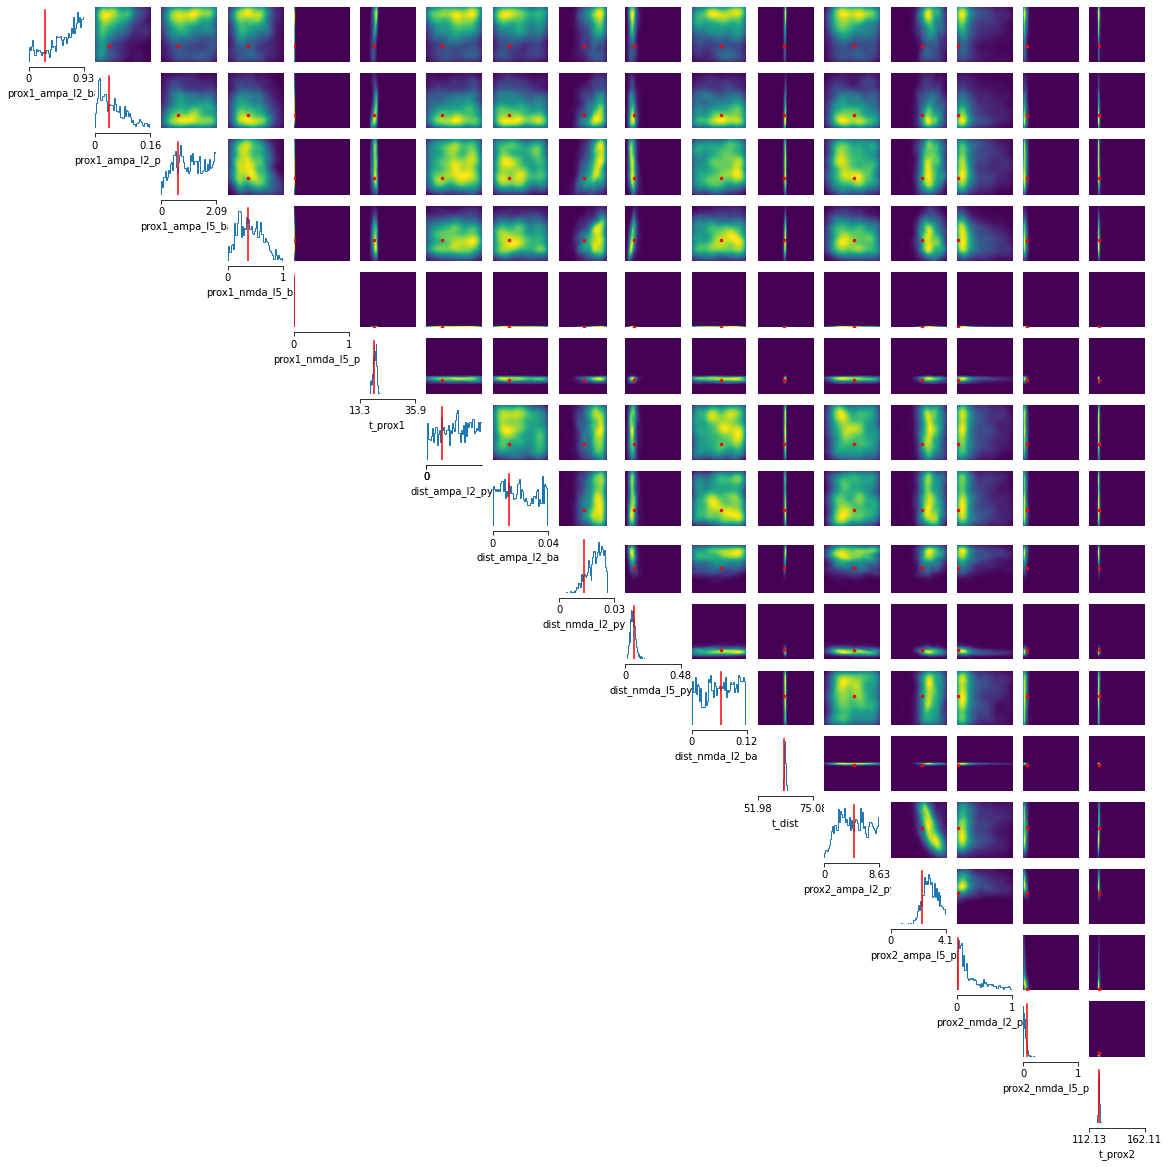

In [51]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

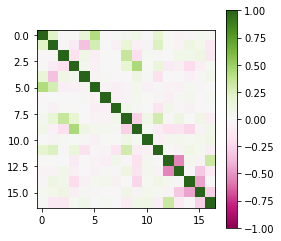

In [50]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [47]:
cond_coeff_mat_list = []


## for the conditional correlation matrix, we had to take the posterior from the second round because leakage was too huge 
## for the third round

posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))

posterior = posteriors_round[1]

for i in range(10):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
  

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  2.499937501562461e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  3.3332962967078146e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  1.999960000799984e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  1.1110987655692714e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  3.333222225925803e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  1.999960000799984e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  0.0
acceptance rate:  3.333222225925803e-05


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 0 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  0.0
acceptance rate:  9.999000099990002e-05


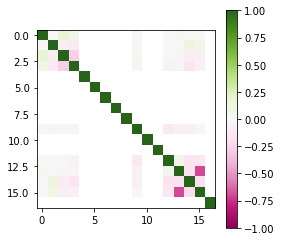

In [48]:
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)

#take average:
cond_coeff_mat_av = torch.nanmean(cond_coeff_mat_tensor, dim=0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)